In [158]:
import math,time,linearmodels
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import seaborn as sns



In [159]:
discount_map = {
    0: 100,
    1: 10,
    5: 50,
    7: 70,
    9: 90
}
type_map={
    "topsales":0,
    "newsales":1,
    "presales":2
}
cate_map = {        #以下可以混合參考
    1: "文學小說",
    2: "商業理財",
    3: "藝術設計",
    4: "人文社科",
    6: "自然科普",
    7: "心理勵志",
    #
    8: "醫療保健",
    9: "飲食",
    10: "生活風格",
    11: "旅遊",
    12: "宗教命理",
    13: "親子教養",
    #獨立看
    14: "青少年文學",
    15: "輕小說",       #
    16: "漫畫、圖文書",  #

    #以下不計
    17: "語言學習",
    18: "考試用書",     #
    19: "電腦資訊",     #
    20: "專業出版品",    #
    22: "影視偶像",
    24: "國中小參考書"    #
}


In [160]:
fangzhi = pd.read_csv("publisher_data_buyable/fangzhi_canbuy.csv")
how = pd.read_csv("publisher_data_buyable/how_canbuy.csv")
jioujing = pd.read_csv("publisher_data_buyable/jioujing_canbuy.csv")
lonely = pd.read_csv("publisher_data_buyable/lonely_canbuy.csv")
shianjiue = pd.read_csv("publisher_data_buyable/shianjiue_canbuy.csv")
yuanshen = pd.read_csv("publisher_data_buyable/yuanshen_canbuy.csv")
times = pd.read_csv("publisher_data_buyable/times_canbuy.csv")

In [161]:
def cleandata(df):
    df['discount'] = df["discount"].fillna(0).astype(str)
    temp = []
    for _ in df['discount']:
        if math.ceil(float(_)) in  discount_map:
            temp.append(discount_map[math.ceil(float(_))])
        else:
            temp.append(math.ceil(float(_)))
    df['discount'] = temp
    df['publishDate'] = pd.to_datetime(df['publication_date'], format='%Y-%m-%d')
    return df

In [162]:
fangzhi = cleandata(fangzhi)
how = cleandata(how)
jioujing = cleandata(jioujing)
lonely = cleandata(lonely)
shianjiue = cleandata(shianjiue)
yuanshen = cleandata(yuanshen)
times = cleandata(times)

In [163]:
dfs = [fangzhi,how,jioujing,lonely,shianjiue,yuanshen,times]
labels = ['fangzhi','how','jioujing','lonely','shianjiue','yuanshen','times']

In [164]:
# caculate original price
for i in range(7):
    dfs[i]['price'] = dfs[i]['price'].fillna(0).astype(str)
    temp = []
    for index,row in dfs[i].iterrows():
       temp.append((float(row['price'])/row['discount']) * 100)
    dfs[i]['original_price'] = temp
    dfs[i]['buyable'] = dfs[i]['canbuy'].astype(bool)
    

In [165]:
dfss = pd.concat(dfs)
dfss

title   author publisher  \
0                            情緒清理日記：寫下來，撕掉，放下悲傷  伊利亞斯‧巴爾        方智   
1           超常規SUPER NORMAL：沒有金錢、人脈、才能，也能創造驚人成就      朱彥奎        方智   
2     超常規SUPER NORMAL：沒有金錢、人脈、才能，也能創造驚人成就 (電子書)      朱彥奎        方智   
3                      情緒清理日記：寫下來，撕掉，放下悲傷 (電子書)  伊利亞斯‧巴爾        方智   
4                      陪自己走走：人生只跟自己有關，不需要每個人都喜歡      艾爾文        方智   
...                                         ...      ...       ...   
7752                             腦筋急轉彎(15)--幽默類       嘎嘎      時報出版   
7753                             腦筋急轉彎(14)--幽默類      曾正忠      時報出版   
7754                                    地北天南敘古今      黃仁宇      時報出版   
7755                                 鬼狐仙怪 (第二部)      蔡志忠      時報出版   
7756                             腦筋急轉彎(13)--幽默類      麥仁杰      時報出版   

     publication_date  discount price  \
0          2024-08-01        79   213   
1          2024-08-01        79   268   
2          2024-08-01       100   214   
3          2024-08-01       100   170   
4          2024-07-05        79   292   
...               ...       ...   ...   
7752       1991-12-18        90    72   
7753       1991-11-18        90    72   
7754       1991-11-15        90   252   
7755       1991-10-15        90    99   
7756       1991-10-15        90    72   

                                                    url canbuy publishDate  \
0     https://www.books.com.tw/products/0010995779?l...    1.0  2024-08-01   
1     https://www.books.com.tw/products/0010995784?l...    1.0  2024-08-01   
2     https://www.books.com.tw/products/E050227221?l...    1.0  2024-08-01   
3     https://www.books.com.tw/products/E050227222?l...    1.0  2024-08-01   
4     https://www.books.com.tw/products/0010993248?l...    1.0  2024-07-05   
...                                                 ...    ...         ...   
7752  https://www.books.com.tw/products/0010100329?l...    0.0  1991-12-18   
7753  https://www.books.com.tw/products/0010100327?l...    0.0  1991-11-18   
7754  https://www.books.com.tw/products/0010069546?l...    0.0  1991-11-15   
7755  https://www.books.com.tw/products/0010100325?l...    0.0  1991-10-15   
7756  https://www.books.com.tw/products/0010100326?l...    0.0  1991-10-15   

      original_price  buyable  
0         269.620253     True  
1         339.240506     True  
2         214.000000     True  
3         170.000000     True  
4         369.620253     True  
...              ...      ...  
7752       80.000000    False  
7753       80.000000    False  
7754      280.000000    False  
7755      110.000000    False  
7756       80.000000    False  

[10757 rows x 11 columns]

In [166]:
#fig,axs = plt.subplots(2,4,figsize=(100,60),sharex=True,sharey=True)
#for i in range(7):
#    df_ = dfs[i][dfs[i]['publishDate']>=datetime.datetime(2010,1,1)]
#    axs[i//4,i%4].scatter(df_['publishDate'],df_['discount'])
#    axs[i//4,i%4].set_title(labels[i],fontsize=80)
#    axs[i//4,i%4].tick_params(axis='both', which='major', labelsize=40)
#    axs[i//4,i%4].set_xlabel("Publish date",fontsize=60)
#    axs[i//4,i%4].set_ylabel("Discount (%)",fontsize=60)
#    x = mdates.date2num(df_['publishDate'])
#    y = df_['discount']
#    z = np.polyfit(x, y, 1)
#    p = np.poly1d(z)
#    axs[i//4,i%4].plot(x, p(x), "r--")
#    """ fit line
#    x = mdates.date2num(df_['publishDate'])
#    y = df_['discount']
#    z = np.polyfit(x, y, 1)
#    p = np.poly1d(z)
#    axs[i//4,i%4].plot(x, p(x), "r--")
#    """
## plt.show()
#fig.suptitle("Scatter Plot of Discount Over Publish Date by Publisher",fontsize=110)
#plt.savefig("./pics/publisher_discount.png")

In [167]:
def detect_electronic_version(df):
    mask1 = df['title'].str.contains("電子書")
    mask2 = df['title'].str.contains("電子版")
    mask3 = df['title'].str.contains("電子閱讀")
    mask4 = df['title'].str.contains("電子")
    mask5 = df['title'].str.contains("電子書")
    mask6 = df['title'].str.contains("電子版")
    mask7 = df['title'].str.contains("電子閱讀")
    mask8 = df['title'].str.contains("電子")
    mask = mask1 | mask2 | mask3 | mask4 | mask5 | mask6 | mask7 | mask8
    df['electronic_version'] = mask
    return df


In [168]:
for i in range(7):
    dfs[i] = detect_electronic_version(dfs[i])

In [169]:
#fig, axs = plt.subplots(2, 4, figsize=(50, 30),sharex=True,sharey=True)
#for i in range(7):
#    #limit after 2000
#    axs[i//4, i%4].scatter(dfs[i][dfs[i]['publishDate']>datetime.datetime(2000,1,1)]['publishDate'], dfs[i][dfs[i]['publishDate']>datetime.datetime(2000,1,1)]['discount'], c = dfs[i][dfs[i]['publishDate']>datetime.datetime(2000,1,1)]['electronic_version'], cmap='PuOr')
#    
#    axs[i//4, i%4].set_title(labels[i], fontsize=30)
#    axs[i//4, i%4].tick_params(axis='both', which='major', labelsize=20)
#    
#
#plt.savefig("./pics/ebook_ver_publisher_discount.png")

In [170]:
#fig,axs = plt.subplots(2,4,figsize=(100,60),sharex=True,sharey=True)
#for i in range(7):
#    df_ = dfs[i][dfs[i]['publishDate']>=datetime.datetime(2000,1,1)]
#    df_ = df_[df_['electronic_version']==False]
#    axs[i//4,i%4].scatter(df_['publishDate'],df_['discount'])
#    axs[i//4,i%4].set_title(labels[i],fontsize=80)
#    axs[i//4,i%4].tick_params(axis='both', which='major', labelsize=40)
#    axs[i//4,i%4].set_xlabel("Publish date",fontsize=60)
#    axs[i//4,i%4].set_ylabel("Discount (%)",fontsize=60)
#    x = mdates.date2num(df_['publishDate'])
#    y = df_['discount']
#    z = np.polyfit(x, y, 1)
#    p = np.poly1d(z)
#    axs[i//4,i%4].plot(x, p(x), "r--")
#    """ fit line
#    x = mdates.date2num(df_['publishDate'])
#    y = df_['discount']
#    z = np.polyfit(x, y, 1)
#    p = np.poly1d(z)
#    axs[i//4,i%4].plot(x, p(x), "r--")
#    """
## plt.show()
#fig.suptitle("Scatter Plot of Discount Over Publish Date by Publisher",fontsize=110)
#plt.savefig("./pics/paper_publisher_discount.png")

In [171]:
#fig,axs = plt.subplots(2,4,figsize=(100,60),sharex=True,sharey=True)
#for i in range(7):
#    df_ = dfs[i][dfs[i]['publishDate']>=datetime.datetime(2000,1,1)]
#    df_ = df_[df_['electronic_version']==False]
#    df_['price'] = df_['price'].astype(float)
#    df_ = df_[df_['original_price']<1000]
#    axs[i//4,i%4].scatter(df_['publishDate'],df_['price'])
#    axs[i//4,i%4].set_title(labels[i],fontsize=80)
#    axs[i//4,i%4].tick_params(axis='both', which='major', labelsize=40)
#    axs[i//4,i%4].set_xlabel("Publish date",fontsize=60)
#    axs[i//4,i%4].set_ylabel("Sale Price",fontsize=60)
#    axs[i//4,i%4].set_ylim(0,1000)
#    x = mdates.date2num(df_['publishDate'])
#    y = df_['price']
#    z = np.polyfit(x, y, 1)
#    p = np.poly1d(z)
#    axs[i//4,i%4].plot(x, p(x), "r--")
#    """ fit line
#    x = mdates.date2num(df_['publishDate'])
#    y = df_['discount']
#    z = np.polyfit(x, y, 1)
#    p = np.poly1d(z)
#    axs[i//4,i%4].plot(x, p(x), "r--")
#    """
## plt.show()
#fig.suptitle("Scatter Plot of SalePrice Over Publish Date by Publisher",fontsize=110)
#plt.savefig("./pics/paper_publisher_salePrice.png")

In [172]:
#fig,axs = plt.subplots(2,4,figsize=(100,60),sharex=True,sharey=True)
#for i in range(7):
#    df_ = dfs[i][dfs[i]['publishDate']>=datetime.datetime(2000,1,1)]
#    df_ = df_[df_['electronic_version']==False]
#    df_['price'] = df_['price'].astype(float)
#    df_ = df_[df_['original_price']<1000]
#    axs[i//4,i%4].scatter(df_['publishDate'],df_['original_price'])
#    axs[i//4,i%4].set_title(labels[i],fontsize=80)
#    axs[i//4,i%4].tick_params(axis='both', which='major', labelsize=40)
#    axs[i//4,i%4].set_xlabel("Publish Date",fontsize=60)
#    axs[i//4,i%4].set_ylabel("Original Price",fontsize=60)
#    axs[i//4,i%4].set_ylim(0,1000)
#    x = mdates.date2num(df_['publishDate'])
#    y = df_['original_price']
#    z = np.polyfit(x, y, 1)
#    p = np.poly1d(z)
#    axs[i//4,i%4].plot(x, p(x), "r--")
#    
#    """ fit line
#    x = mdates.date2num(df_['publishDate'])
#    y = df_['discount']
#    z = np.polyfit(x, y, 1)
#    p = np.poly1d(z)
#    axs[i//4,i%4].plot(x, p(x), "r--")
#    """
## plt.show()
#fig.suptitle("Scatter Plot of Original Price Over Publish Date by Publisher",fontsize=110)
#plt.savefig("./pics/paper_publisher_OriginalPrice.png")

In [173]:
#fig, axs = plt.subplots(2, 4, figsize=(40, 20),sharey=True,sharex=True)
#for i in range(7):
#    scatter = axs[i//4, i%4].scatter(dfs[i]['publishDate'], dfs[i]['discount'], c = dfs[i]['electronic_version'], cmap='bwr')
#    axs[i//4, i%4].set_title(labels[i], fontsize=30)
#    axs[i//4, i%4].tick_params(axis='both', which='major', labelsize=20)  # Change the size of the numbers on the axes
#
## Add a colorbar to the figure
#cbar = plt.colorbar(scatter, ticks=[0, 1])
#cbar.set_label('Electronic Version', rotation=270, labelpad=20, fontsize=20)
#cbar.ax.tick_params(labelsize=20)  # Change the size of the colorbar tick labels
#cbar.set_ticklabels(['is_paper', 'is_ebook'])  # Set the tick labels to 'is_paper' and 'is_ebook'
#plt.suptitle('Publisher Discount and Electronic Version', fontsize=40)
#plt.savefig("./pics/ebook_ver_publisher_discount.png")

In [174]:
ebookdfs = [i[i['electronic_version']==True] for i in dfs ]

In [175]:
for i in range(len(ebookdfs)):
    ebookdfs[i] = ebookdfs[i].reset_index(drop=True)
    temp = []
    
    for j in range(len(ebookdfs[i])):
        temp.append(ebookdfs[i].iloc[j]['title'].replace(" (電子書)",""))
    ebookdfs[i]['title'] = temp

In [176]:
    
for i in range(len(ebookdfs)):
    temp1 = []
    temp2 = []
    temp3 = []
    for j in range(len(ebookdfs[i])):
        try:
            temp1.append((dfs[i][dfs[i]['title']==ebookdfs[i].iloc[j]['title']].iloc[0]['price']))
        except:
            temp1.append(None)
        try:
            temp2.append((dfs[i][dfs[i]['title']==ebookdfs[i].iloc[j]['title']].iloc[0]['original_price']))
        except:
            temp2.append(None)
        try:
            temp3.append((dfs[i][dfs[i]['title']==ebookdfs[i].iloc[j]['title']].iloc[0]['discount']))
        except:
            temp3.append(None)
    ebookdfs[i]['paper_price'] = temp1
    ebookdfs[i]['paper_original_price'] = temp2
    ebookdfs[i]['paper_discount'] = temp3
    
    temp = []
    temp1 = []
    for j in range(len(ebookdfs[i])):
        if ebookdfs[i]['paper_price'][j] is not None:
            temp.append((float(ebookdfs[i]['price'][j])/float(ebookdfs[i]['paper_price'][j]))*100)
        else:
            temp.append(None)     
        if ebookdfs[i]['paper_discount'][j] is not None and ebookdfs[i]['discount'][j] is not None and ebookdfs[i]['paper_price'][j] is not None:
            temp1.append(((float(ebookdfs[i]['price'][j])/float(ebookdfs[i]['discount'][j]))
                          /(float(ebookdfs[i]['paper_price'][j])/float(ebookdfs[i]['paper_discount'][j])))*100)
        else:
            temp1.append(None)
    ebookdfs[i]['discount_rate_of_ebook'] = temp
    ebookdfs[i]['discount_rate_of_ebook_in_origion'] = temp1
    
    
        

In [177]:
ebookdfs[0]

title                     author publisher  \
0    超常規SUPER NORMAL：沒有金錢、人脈、才能，也能創造驚人成就                        朱彥奎        方智   
1                     情緒清理日記：寫下來，撕掉，放下悲傷                    伊利亞斯‧巴爾        方智   
2                一分鐘講清楚：從此不再被問「你到底想說什麼?」                      沖本留里子        方智   
3           寫給年輕人的靜心課：超速高壓時代，拯救無數學子的安靜力量                        李德柱        方智   
4                        沉浸式思考：自我革命，改變人生                        黃農文        方智   
..                                   ...                        ...       ...   
213                 怦然心動的人生整理魔法2：實踐篇‧解惑篇                      近藤麻理惠        方智   
214                        NLP之父3天改變你的一生  理查．班德勒、艾里西歐．羅伯堤、歐文．菲茲帕特里克        方智   
215                      零雜物：讓生活輕盈，讓心更自由                    Phyllis        方智   
216                          怦然心動的人生整理魔法                      近藤麻理惠        方智   
217                 零極限：創造健康、平靜與財富的夏威夷療法          伊賀列卡拉．修．藍博士,喬．維泰利        方智   

    publication_date  discount price  \
0         2024-08-01       100   214   
1         2024-08-01       100   170   
2         2024-07-01        88   184   
3         2024-06-01        88   215   
4         2024-06-01        88   240   
..               ...       ...   ...   
213       2013-04-25       100   175   
214       2013-01-24       100   168   
215       2012-05-24        88   180   
216       2011-10-25        88   154   
217       2009-03-25        88   167   

                                                   url  canbuy publishDate  \
0    https://www.books.com.tw/products/E050227221?l...    True  2024-08-01   
1    https://www.books.com.tw/products/E050227222?l...    True  2024-08-01   
2    https://www.books.com.tw/products/E050223261?l...    True  2024-07-01   
3    https://www.books.com.tw/products/E050217703?l...    True  2024-06-01   
4    https://www.books.com.tw/products/E050217704?l...    True  2024-06-01   
..                                                 ...     ...         ...   
213  https://www.books.com.tw/products/E050005131?l...    True  2013-04-25   
214  https://www.books.com.tw/products/E050051966?l...    True  2013-01-24   
215  https://www.books.com.tw/products/E050050686?l...    True  2012-05-24   
216  https://www.books.com.tw/products/E050005083?l...    True  2011-10-25   
217  https://www.books.com.tw/products/E050010292?l...    True  2009-03-25   

     original_price  buyable  electronic_version paper_price  \
0        214.000000     True                True         268   
1        170.000000     True                True         213   
2        209.090909     True                True         237   
3        244.318182     True                True         276   
4        272.727273     True                True         308   
..              ...      ...                 ...         ...   
213      175.000000     True                True        None   
214      168.000000     True                True         189   
215      204.545455     True                True         234   
216      175.000000     True                True         197   
217      189.772727     True                True         221   

     paper_original_price  paper_discount  discount_rate_of_ebook  \
0              339.240506            79.0               79.850746   
1              269.620253            79.0               79.812207   
2              300.000000            79.0               77.637131   
3              349.367089            79.0               77.898551   
4              389.873418            79.0               77.922078   
..                    ...             ...                     ...   
213                   NaN             NaN                     NaN   
214            239.240506            79.0               88.888889   
215            260.000000            90.0               76.923077   
216            249.367089            79.0               78.172589   
217            279.746835            79.0               75.565611   

     discount_rate_of_ebook_in_origion  
0    

In [178]:
#fig, axs = plt.subplots(2,4, figsize=(40, 20),sharey=True,sharex=True)
#for i in range(7):
#    scatter = axs[i//4, i%4].scatter(ebookdfs[i]['publishDate'], ebookdfs[i]['discount_rate_of_ebook'])
#    axs[i//4, i%4].set_title(labels[i], fontsize=30)
#    axs[i//4, i%4].tick_params(axis='both', which='major', labelsize=20)  # Change the size of the numbers on the axes
#fig.suptitle('Discount Rate of Electronic Version by publish date', fontsize=40)
#plt.savefig("./pics/ebook_ver_publisher_discount_rate.png")

In [179]:
#fig, axs = plt.subplots(2, 4, figsize=(70, 20),sharey=True)
#for i in range(7):
#    scatter = axs[i//4, i%4].scatter(ebookdfs[i]['price'], ebookdfs[i]['discount_rate_of_ebook'])
#    axs[i//4, i%4].set_title(labels[i], fontsize=30)
#    axs[i//4, i%4].tick_params(axis='both', which='major', labelsize=10)  # Change the size of the numbers on the axes
#fig.suptitle('Discount Rate  Electronic Version by Price', fontsize=40)
#plt.savefig("./pics/ebook_ver_publisher_discount_rate_by_price.png")

In [180]:
dfs[1]


title      author publisher  \
0                          你願意，人生就會值得：蔡康永的情商課3         蔡康永        如何   
1    你願意，人生就會值得：蔡康永的情商課3【作者親簽蓋印+博客來週年慶獨家‧雙面書籤】         蔡康永        如何   
2           你願意，人生就會值得：蔡康永的情商課3【博客來週年慶獨家‧雙面書籤】         蔡康永        如何   
3                       超神閒談力：增強人際互動，簽約率成長2.5倍        中北朋宏        如何   
4                    優勢思維：最強自我分析!開啟人生與工作的更多可能性  Grace（李冠萱）        如何   
..                                         ...         ...       ...   
550                                你一定可以通過推薦甄選         鄭清榮        如何   
551                          幽默就很迷人：讓你大受歡迎的說話術          南琦        如何   
552                      這個字，英文你會說嗎?學校學不到的實用英語       講談社國際        如何   
553                               你也可以說一漂亮英語名句         遠山顯        如何   
554                             要美麗 :楊思敏美容泡澡祕方         楊思敏        如何   

    publication_date  discount price  \
0         2024-08-01        79   316   
1         2024-08-01        79   316   
2         2024-08-01        79   316   
3         2024-08-01        79   292   
4         2024-08-01        79   284   
..               ...       ...   ...   
550       2000-07-05        90   225   
551       2000-07-05        90   180   
552       2000-07-01        90   180   
553       2000-07-01        90   180   
554       2000-07-01       100   250   

                                                   url  canbuy publishDate  \
0    https://www.books.com.tw/products/0010995752?l...     1.0  2024-08-01   
1    https://www.books.com.tw/products/0010995753?l...     0.0  2024-08-01   
2    https://www.books.com.tw/products/0010995755?l...     1.0  2024-08-01   
3    https://www.books.com.tw/products/0010995783?l...     1.0  2024-08-01   
4    https://www.books.com.tw/products/0010995789?l...     1.0  2024-08-01   
..                                                 ...     ...         ...   
550  https://www.books.com.tw/products/0010121114?l...     0.0  2000-07-05   
551  https://www.books.com.tw/products/0010121113?l...     0.0  2000-07-05   
552  https://www.books.com.tw/products/0010121115?l...     0.0  2000-07-01   
553  https://www.books.com.tw/products/0010121116?l...     0.0  2000-07-01   
554  https://www.books.com.tw/products/0010121118?l...     0.0  2000-07-01   

     original_price  buyable  electronic_version  
0        400.000000     True               False  
1        400.000000    False               False  
2        400.000000     True               False  
3        369.620253     True               False  
4        359.493671     True               False  
..              ...      ...                 ...  
550      250.000000    False               False  
551      200.000000    False               False  
552      200.000000    False               False  
553      200.000000    False               False  
554      250.000000    False               False  

[555 rows x 12 columns]

In [181]:
#fig, axs = plt.subplots(2, 4, figsize=(40, 20),sharey=True)
#for i in range(7):
#    scatter = axs[i//4, i%4].scatter(ebookdfs[i]['original_price'], ebookdfs[i]['discount_rate_of_ebook'])
#    axs[i//4, i%4].set_title(labels[i], fontsize=30)
#    axs[i//4, i%4].tick_params(axis='both', which='major', labelsize=20)  # Change the size of the numbers on the axes
#fig.suptitle('Publisher Discount Rate On Electronic Version by Price', fontsize=40)
#plt.savefig("./pics/ebook_ver_publisher_discount_rate_by_original_price.png")

In [182]:
#ig, axs = plt.subplots(2,4, figsize=(40, 20),sharey=True,sharex=True)
#for i in range(7):
#    sns.kdeplot(ebookdfs[i],x = 'publishDate',y="discount_rate_of_ebook", ax=axs[i//4, i%4],  cmap="Reds", fill=True)
#    axs[i//4, i%4].set_title(labels[i], fontsize=30)
#    axs[i//4, i%4].tick_params(axis='both', which='major', labelsize=20)  # Change the size of the numbers on the axes
#ig.suptitle('Discount Rate of Electronic Version by publish date', fontsize=40)
#plt.savefig("./pics/ebook_ver_publisher_discount_rate_kdeplot.png")

In [183]:
#fig, axs = plt.subplots(2, 4, figsize=(40, 20),sharey=True,sharex=True)
#for i in range(7):
#    sns.kdeplot(ebookdfs[i],x = 'original_price',y="discount_rate_of_ebook", ax=axs[i//4, i%4],  cmap="Reds", fill=True)
#    axs[i//4, i%4].set_title(labels[i], fontsize=30)
#    axs[i//4, i%4].tick_params(axis='both', which='major', labelsize=20)  # Change the size of the numbers on the axes
#fig.suptitle('Publisher Discount Rate On Electronic Version by Price', fontsize=40)
#plt.savefig("./pics/ebook_ver_publisher_discount_rate_by_original_price_kdeplot.png")

In [184]:
#over = []
#for i in range(7):
#    over.append(ebookdfs[i][ebookdfs[i]['discount_rate_of_ebook']>=100])
#

In [185]:
#ebookdfs[0]

In [186]:
#for i in over:
#    i = i.reset_index(drop=True)
#    print(i,end="\n\n")

In [187]:
#fig, axs = plt.subplots(2, 4, figsize=(40, 20),sharey=True)
#for i in range(7):
#    sns.kdeplot(dfs[i],x = 'publishDate',y="discount", ax=axs[i//4, i%4],  cmap="Reds", fill=True)
#    axs[i//4, i%4].set_title(labels[i], fontsize=30)
#    axs[i//4, i%4].tick_params(axis='both', which='major', labelsize=20)  # Change the size of the numbers on the axes
#
## Add a colorbar to the figure
#cbar = plt.colorbar(scatter, ticks=[0, 1])
#cbar.set_label('Electronic Version', rotation=270, labelpad=20, fontsize=20)
#cbar.ax.tick_params(labelsize=20)  # Change the size of the colorbar tick labels
#cbar.set_ticklabels(['is_paper', 'is_ebook'])  # Set the tick labels to 'is_paper' and 'is_ebook'
#plt.suptitle(' Discount and publish date', fontsize=40)
#plt.savefig("./pics/ebook_ver_publisher_discount_kdeplot.png")

In [188]:
#fig, axs = plt.subplots(2, 4, figsize=(40, 20))
#for i in range(7):
#    sns.kdeplot(ebookdfs[i],x = 'original_price',y="discount_rate_of_ebook_in_origion", ax=axs[i//4, i%4],  cmap="Reds", fill=True)
#    axs[i//4, i%4].set_title(labels[i], fontsize=30)
#    axs[i//4, i%4].tick_params(axis='both', which='major', labelsize=20)  # Change the size of the numbers on the axes
#fig.suptitle('original price of paper book and discount of ebook original price', fontsize=40)
#plt.savefig("./pics/ebook_ver_publisher_discount_on_origion_price_rate_by_original_price_kdeplot.png")

In [189]:
#fig, axs = plt.subplots(2, 4, figsize=(40, 20))
#for i in range(7):
#    axs[i//4, i%4].hist(ebookdfs[i]['discount_rate_of_ebook_in_origion'],bins=20)
#    axs[i//4, i%4].set_title(labels[i], fontsize=30)
#fig.suptitle('Publisher Discount Rate On Electronic Version by Price', fontsize=40)
#plt.savefig("./pics/ebook_ver_publisher_discount_on_origion_price_rate_by_original_price_hist.png")

In [190]:
#fig, axs = plt.subplots(2, 4, figsize=(40, 20),sharex=True,sharey= True)
#for i in range(7):
#    axs[i//4, i%4].hist(ebookdfs[i]['discount'],bins=20,density=True)
#    axs[i//4, i%4].set_title(labels[i], fontsize=30)
#    axs[i//4, i%4].set_xlabel("discount",fontsize=20)
#    axs[i//4, i%4].set_ylabel("density",fontsize=20)
#    axs[i//4, i%4].tick_params(axis='both', which='major', labelsize=20)  # Change the size of the numbers on the axes
#fig.suptitle('Discount of Ebooks books', fontsize=40)
#plt.savefig("./pics/publisher_discount_of_ebooks.png")

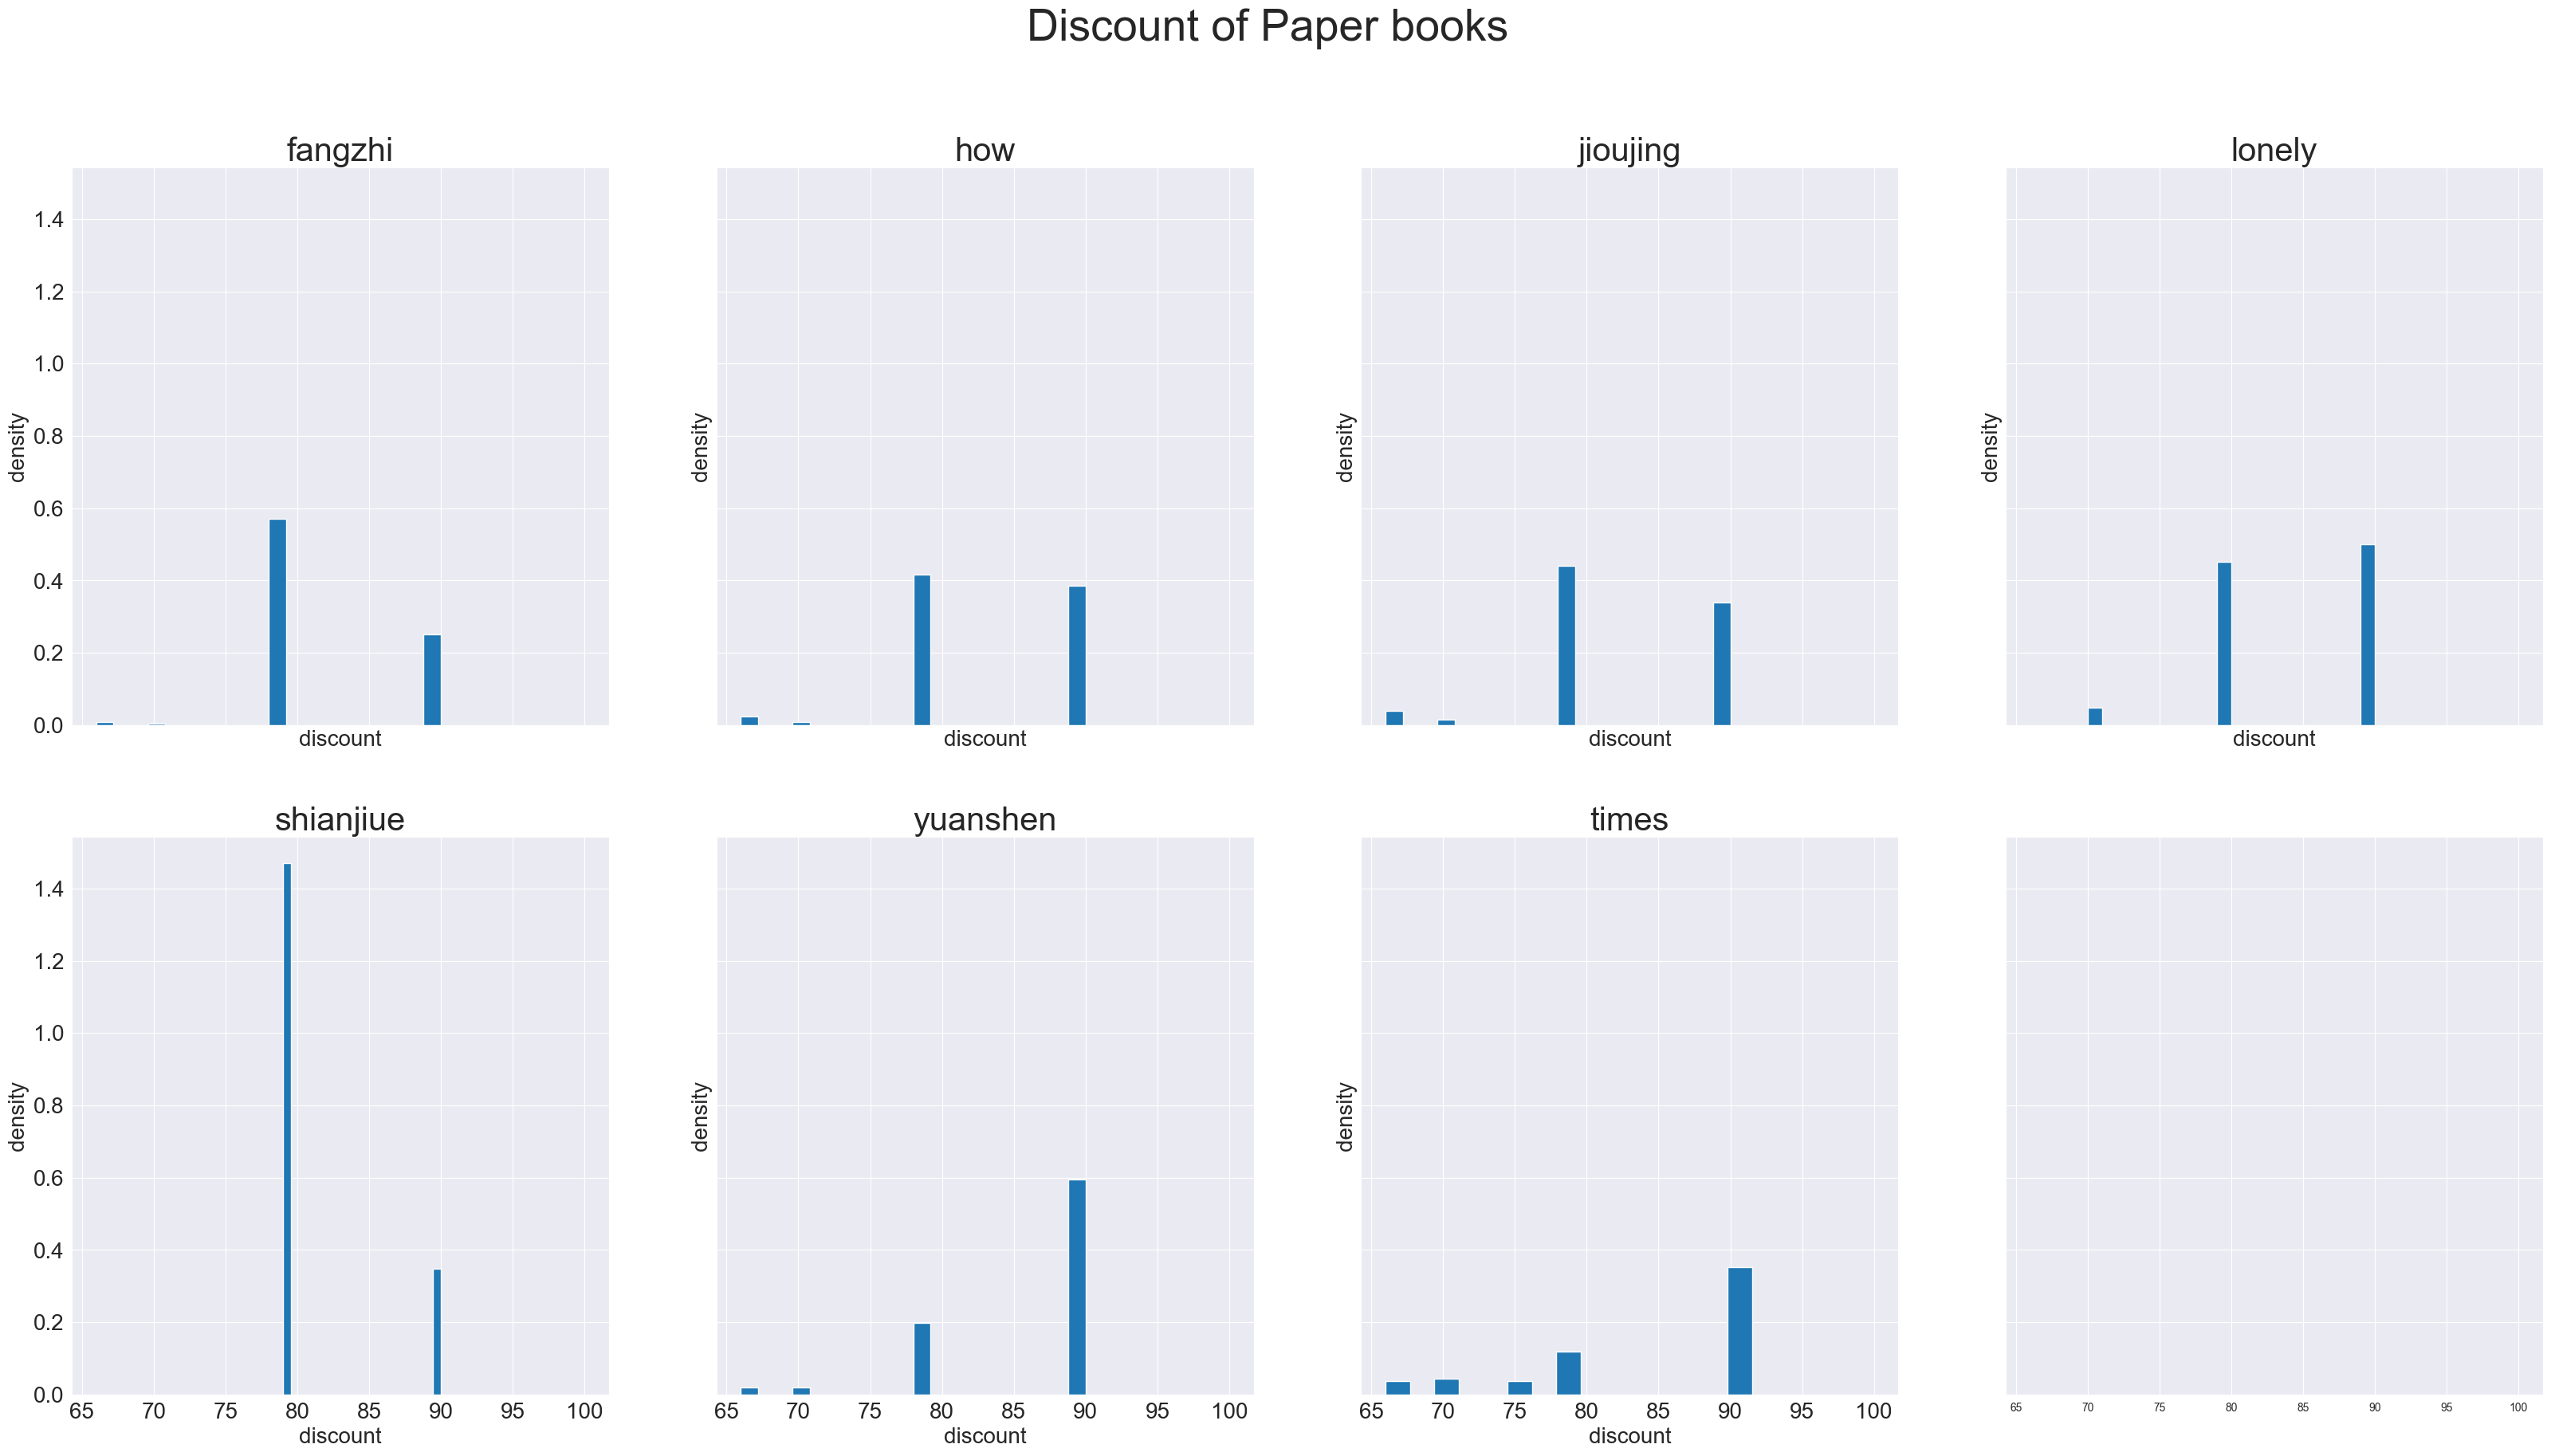

In [191]:
fig, axs = plt.subplots(2, 4, figsize=(40, 20),sharex=True,sharey= True)
for i in range(7):
    axs[i//4, i%4].hist(ebookdfs[i]['paper_discount'],bins=20,density=True)
    axs[i//4, i%4].set_title(labels[i], fontsize=30)
    axs[i//4, i%4].set_xlabel("discount",fontsize=20)
    axs[i//4, i%4].set_ylabel("density",fontsize=20)
    axs[i//4, i%4].tick_params(axis='both', which='major', labelsize=20)  # Change the size of the numbers on the axes
fig.suptitle('Discount of Paper books', fontsize=40)
plt.savefig("./pics/publisher_discount_of_paper_books.png")

In [192]:
#fig, axs = plt.subplots(2, 4, figsize=(40, 25),sharex=True,sharey= True)
#for i in range(7):
#    axs[i//4, i%4].scatter(ebookdfs[i][ebookdfs[i]['original_price']<700]['paper_original_price'],ebookdfs[i][ebookdfs[i]['original_price']<700]['original_price'])
#    x = np.linspace(0,700,100)
#    axs[i//4, i%4].plot(x,x*0.7,'r--')
#    axs[i//4, i%4].set_title(labels[i], fontsize=30)
#    axs[i//4, i%4].tick_params(axis='both', which='major', labelsize=20)  # Change the size of the numbers on the axes
#    axs[i//4, i%4].set_xlabel("paper original price",fontsize=20)
#    axs[i//4, i%4].set_ylabel("ebook original price",fontsize=20)
#fig.suptitle('Paper Book Original Price Verses Ebook Original Price', fontsize=40)
#plt.savefig("./pics/ebook_ver_publisher_discount_on_origion_price_rate_by_original_price_scatter.png")

In [193]:
#fig, axs = plt.subplots(2, 4, figsize=(40, 20),sharex=True)
#for i in range(7):
#    axs[i//4, i%4].hist(ebookdfs[i]['discount_rate_of_ebook_in_origion'], density=True)
#    axs[i//4, i%4].set_title(labels[i], fontsize=30)
#fig.suptitle('Publisher Discount Rate On Electronic Version by Price', fontsize=40)
#plt.savefig("./pics/ebook_ver_publisher_discount_on_origion_price_rate_by_original_price_hist.png")

In [194]:
#fig, axs = plt.subplots(2, 4, figsize=(40, 20),sharex=True)
#bin_width = 1  # You can adjust this value to change the bin width
#bin_edges = np.arange(start=ebookdfs[0]['discount_rate_of_ebook_in_origion'].min(),
#                      stop=ebookdfs[0]['discount_rate_of_ebook_in_origion'].max() + bin_width,
#                      step=bin_width)
#
#for i in range(7):
#    axs[i//4, i%4].hist(ebookdfs[i]['discount_rate_of_ebook_in_origion'], bins=bin_edges, density=True)
#    axs[i//4, i%4].set_title(labels[i], fontsize=30)
#
#fig.suptitle('Discount rate of ebook and paper book by original price', fontsize=40)
#plt.savefig("./pics/ebook_ver_publisher_discount_on_origion_price_rate_by_original_price_hist.png")

In [195]:
#ig, axs = plt.subplots(2, 4, figsize=(40, 20),sharex=True,sharey= True)
#or i in range(7):
#   sns.kdeplot(ebookdfs[i],x = 'paper_discount',y="discount", ax=axs[i//4, i%4],  cmap="Reds", fill=True)
#   axs[i//4, i%4].set_title(labels[i], fontsize=30)
#   axs[i//4, i%4].tick_params(axis='both', which='major', labelsize=20) 
#   axs[i//4,i%4].set_ylabel("ebook discount")
#ig.suptitle('original price of paper book and discount of ebook original price', fontsize=40)
#lt.savefig("./pics/ebook_ver_publisher_discount_on_origion_price_rate_by_original_price_kdeplot.png")

In [196]:
#over = []

#for i in range(7):
#    mask1 = ebookdfs[i]['discount_rate_of_ebook_in_origion']>=100
#    over.append(ebookdfs[i][mask1])
#    
#over_ = pd.DataFrame()
#for i in over:
#    over_ = pd.concat([over_,i],axis=0)

In [197]:
#over_ = over_.reset_index(drop=True)[['title','original_price','price','discount','paper_original_price','paper_price','paper_discount']]

In [198]:
#over_.columns = ['title',"ebook_original_price",'ebook_price','ebook_discount','paper_original_price','paper_price','paper_discount']

In [199]:
#mask = over_['ebook_price'] <= over_['paper_price']
#over_[mask]

In [200]:
#over_

In [201]:
#fig,ax = plt.subplots(1,1,figsize=(15,15))
#scatter = sns.kdeplot(data = over_,y  = 'ebook_discount',x = 'paper_discount')
#plt.xlabel("paper original price")
#plt.ylabel("ebook original price")
##draw 45 degree line
#plt.plot([0, 150], [0, 150], 'k-', lw=2)
#plt.savefig("./pics/ebook_paper_price_original.png")

In [202]:

#fig,ax = plt.subplots(1,1,figsize=(15,15))
#scatter = plt.scatter(y = over_['ebook_price'].astype(int),x = over_['paper_price'].astype(int))
#plt.xlabel("paper  price")
#plt.ylabel("ebook  price")
##draw 45 degree line
#plt.plot([0, 600], [0, 600], 'k-', lw=2)
#plt.savefig("./pics/ebook_paper_price.png")

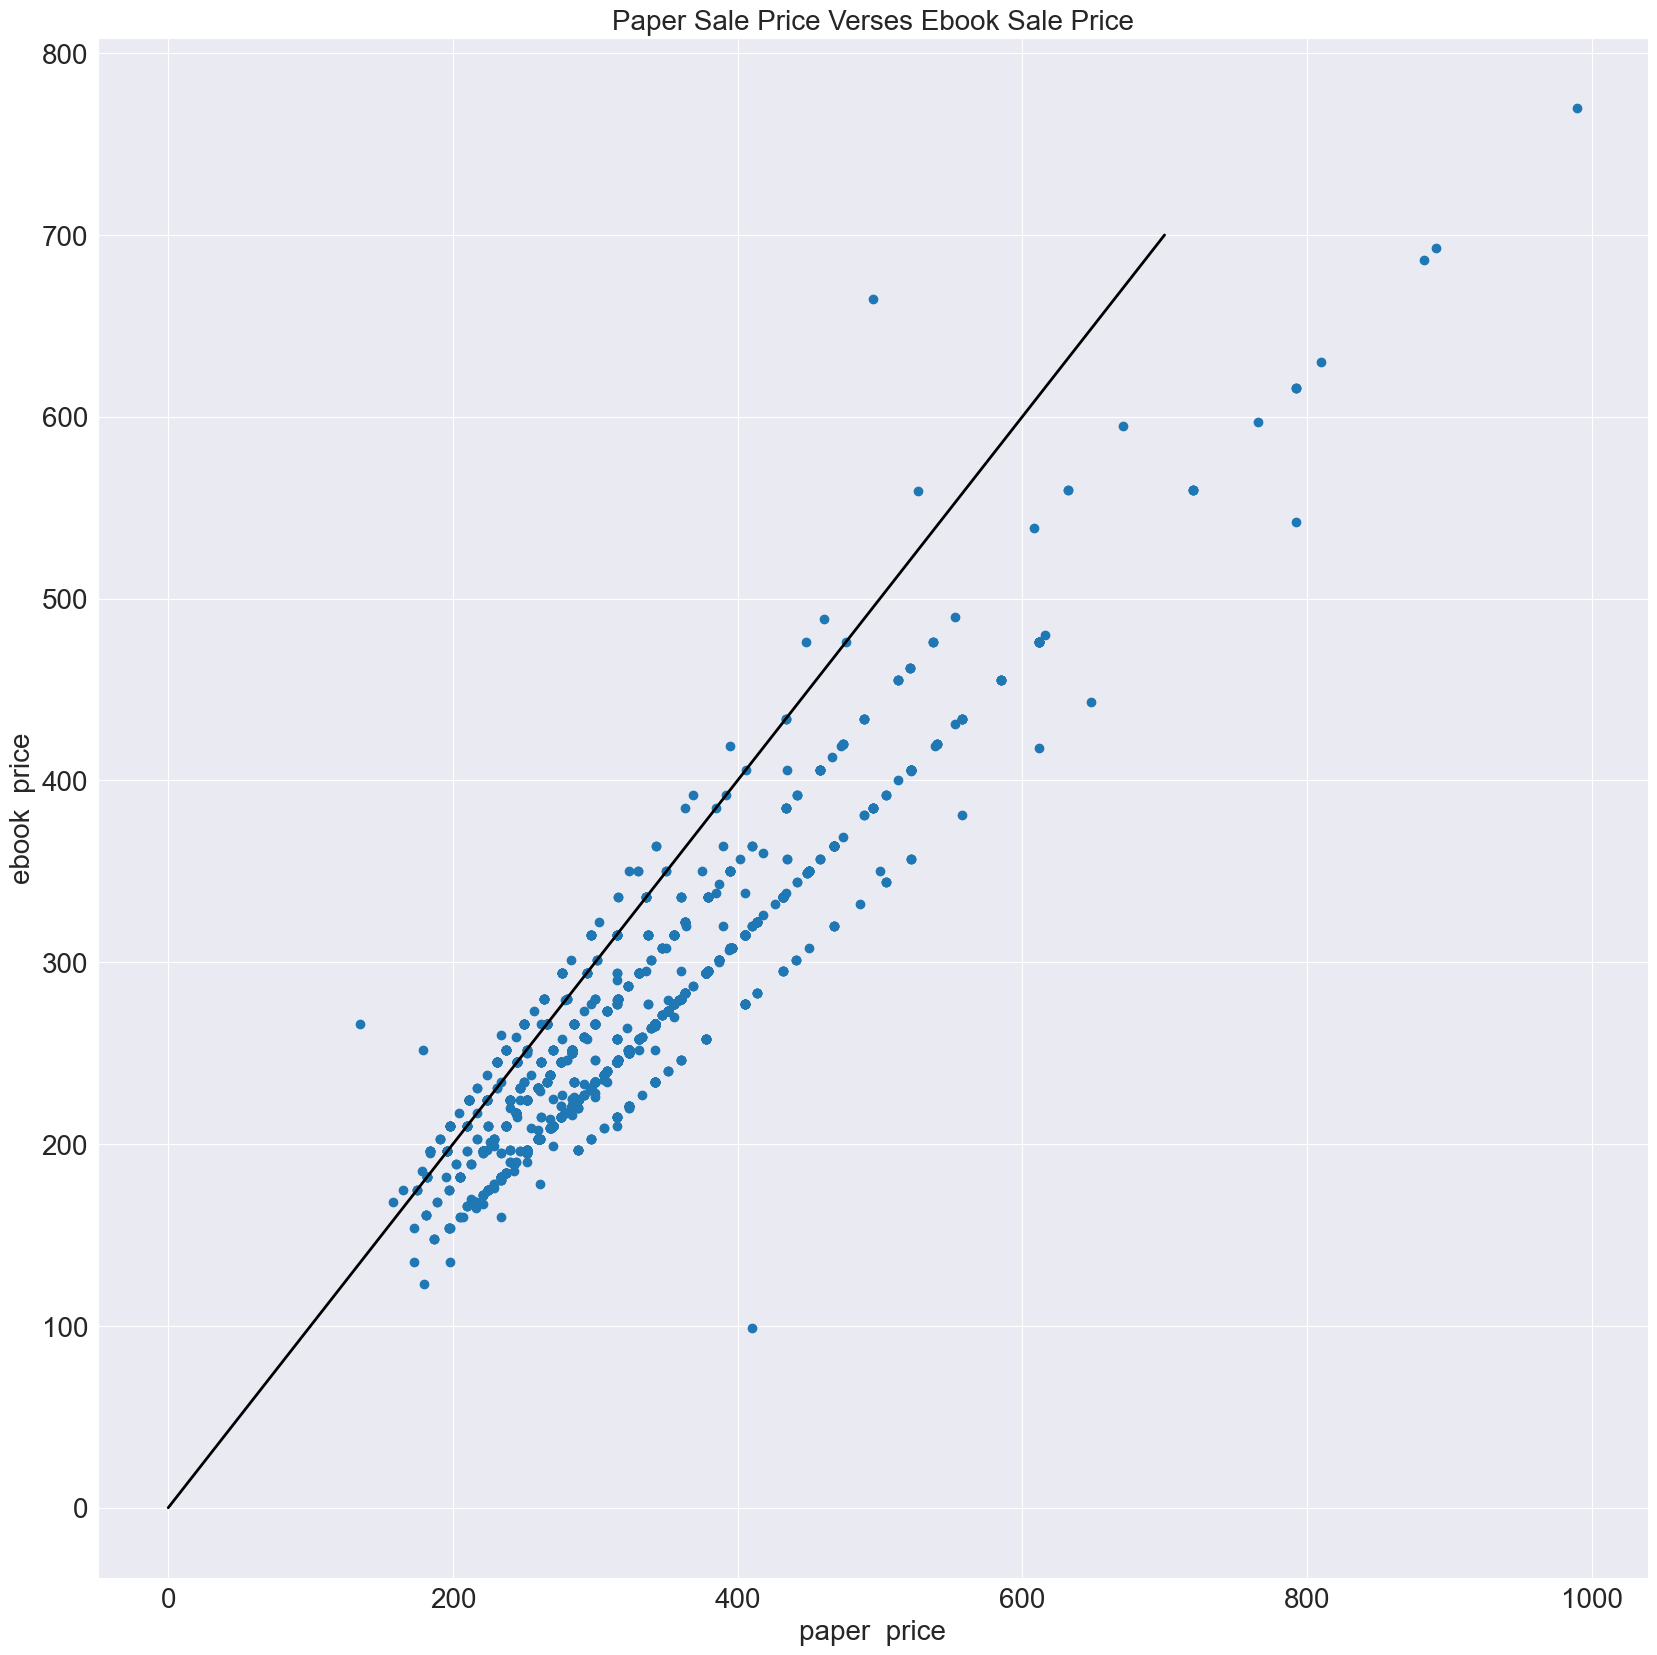

In [203]:
edfss = pd.concat(ebookdfs)
edfss['paper_price'] = edfss['paper_price'].astype(float)
edfss['price'] = edfss['price'].astype(float)
edfss = edfss[edfss['paper_price']<1000]
plt.figure(figsize=(20,20))
plt.scatter(edfss['paper_price'],edfss['price'])
plt.xlabel("paper  price",fontsize = 20)
plt.ylabel("ebook  price",fontsize = 20)
plt.plot([0, 700], [0, 700], 'k-', lw=2)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title("Paper Sale Price Verses Ebook Sale Price",fontsize = 20)
plt.savefig("./pics/ebook_paper_price.png")

In [204]:
#___df = pd.read_csv("./dateData/allSalesData.csv")
#populist = ___df["title"].to_list()

In [205]:
#plt.figure(figsize=(20,20))
#df_ = dfs[6][dfs[6]['publishDate']>=datetime.datetime(2010,1,1)]
#df_ = df_[df_['electronic_version']==False]
#df_['price'] = df_['price'].astype(float)
#df_["ispop"] = df_['title'].isin(populist)
#plt.scatter(df_['publishDate'],df_['discount'],c = df_['ispop'],cmap='bwr')
#plt.tick_params(axis='both', which='major', labelsize=40)
#plt.xlabel("Publish date")
#plt.ylabel("Discount (%)")
#x = mdates.date2num(df_['publishDate'])
#y = df_['discount']
#z = np.polyfit(x, y, 1)
#p = np.poly1d(z)
#plt.plot(x, p(x), "r--")
#plt.show()

In [206]:
#plt.figure(figsize=(20,20))
#df_ = dfs[6][dfs[6]['publishDate']>=datetime.datetime(2010,1,1)]
#df_ = df_[df_['electronic_version']==False]
#df_['price'] = df_['price'].astype(float)
#df_["istime"] = df_['title'].isin(populist)
#df_ = df_[df_['istime']==True]
#plt.scatter(df_['publishDate'],df_['discount'])
#plt.tick_params(axis='both', which='major', labelsize=40)
#plt.xlabel("Publish date")
#plt.ylabel("Discount (%)")
#x = mdates.date2num(df_['publishDate'])
#y = df_['discount']
#z = np.polyfit(x, y, 1)
#p = np.poly1d(z)
#plt.plot(x, p(x), "r--")
#plt.show()

In [207]:
#___df = pd.read_csv("./dateData/allSalesData.csv")
___df = pd.read_csv("./data/2024-08-05_allSales.csv")
populist = ___df["title"].to_list()
yusandf = pd.concat([dfs[i] for i in range(6)])
timedf = dfs[6]
yusandf['ispop'] = yusandf['title'].isin(populist)
timedf['ispop'] = timedf['title'].isin(populist)
ndfs = [yusandf,timedf]
nlabels = ['yusan','time']

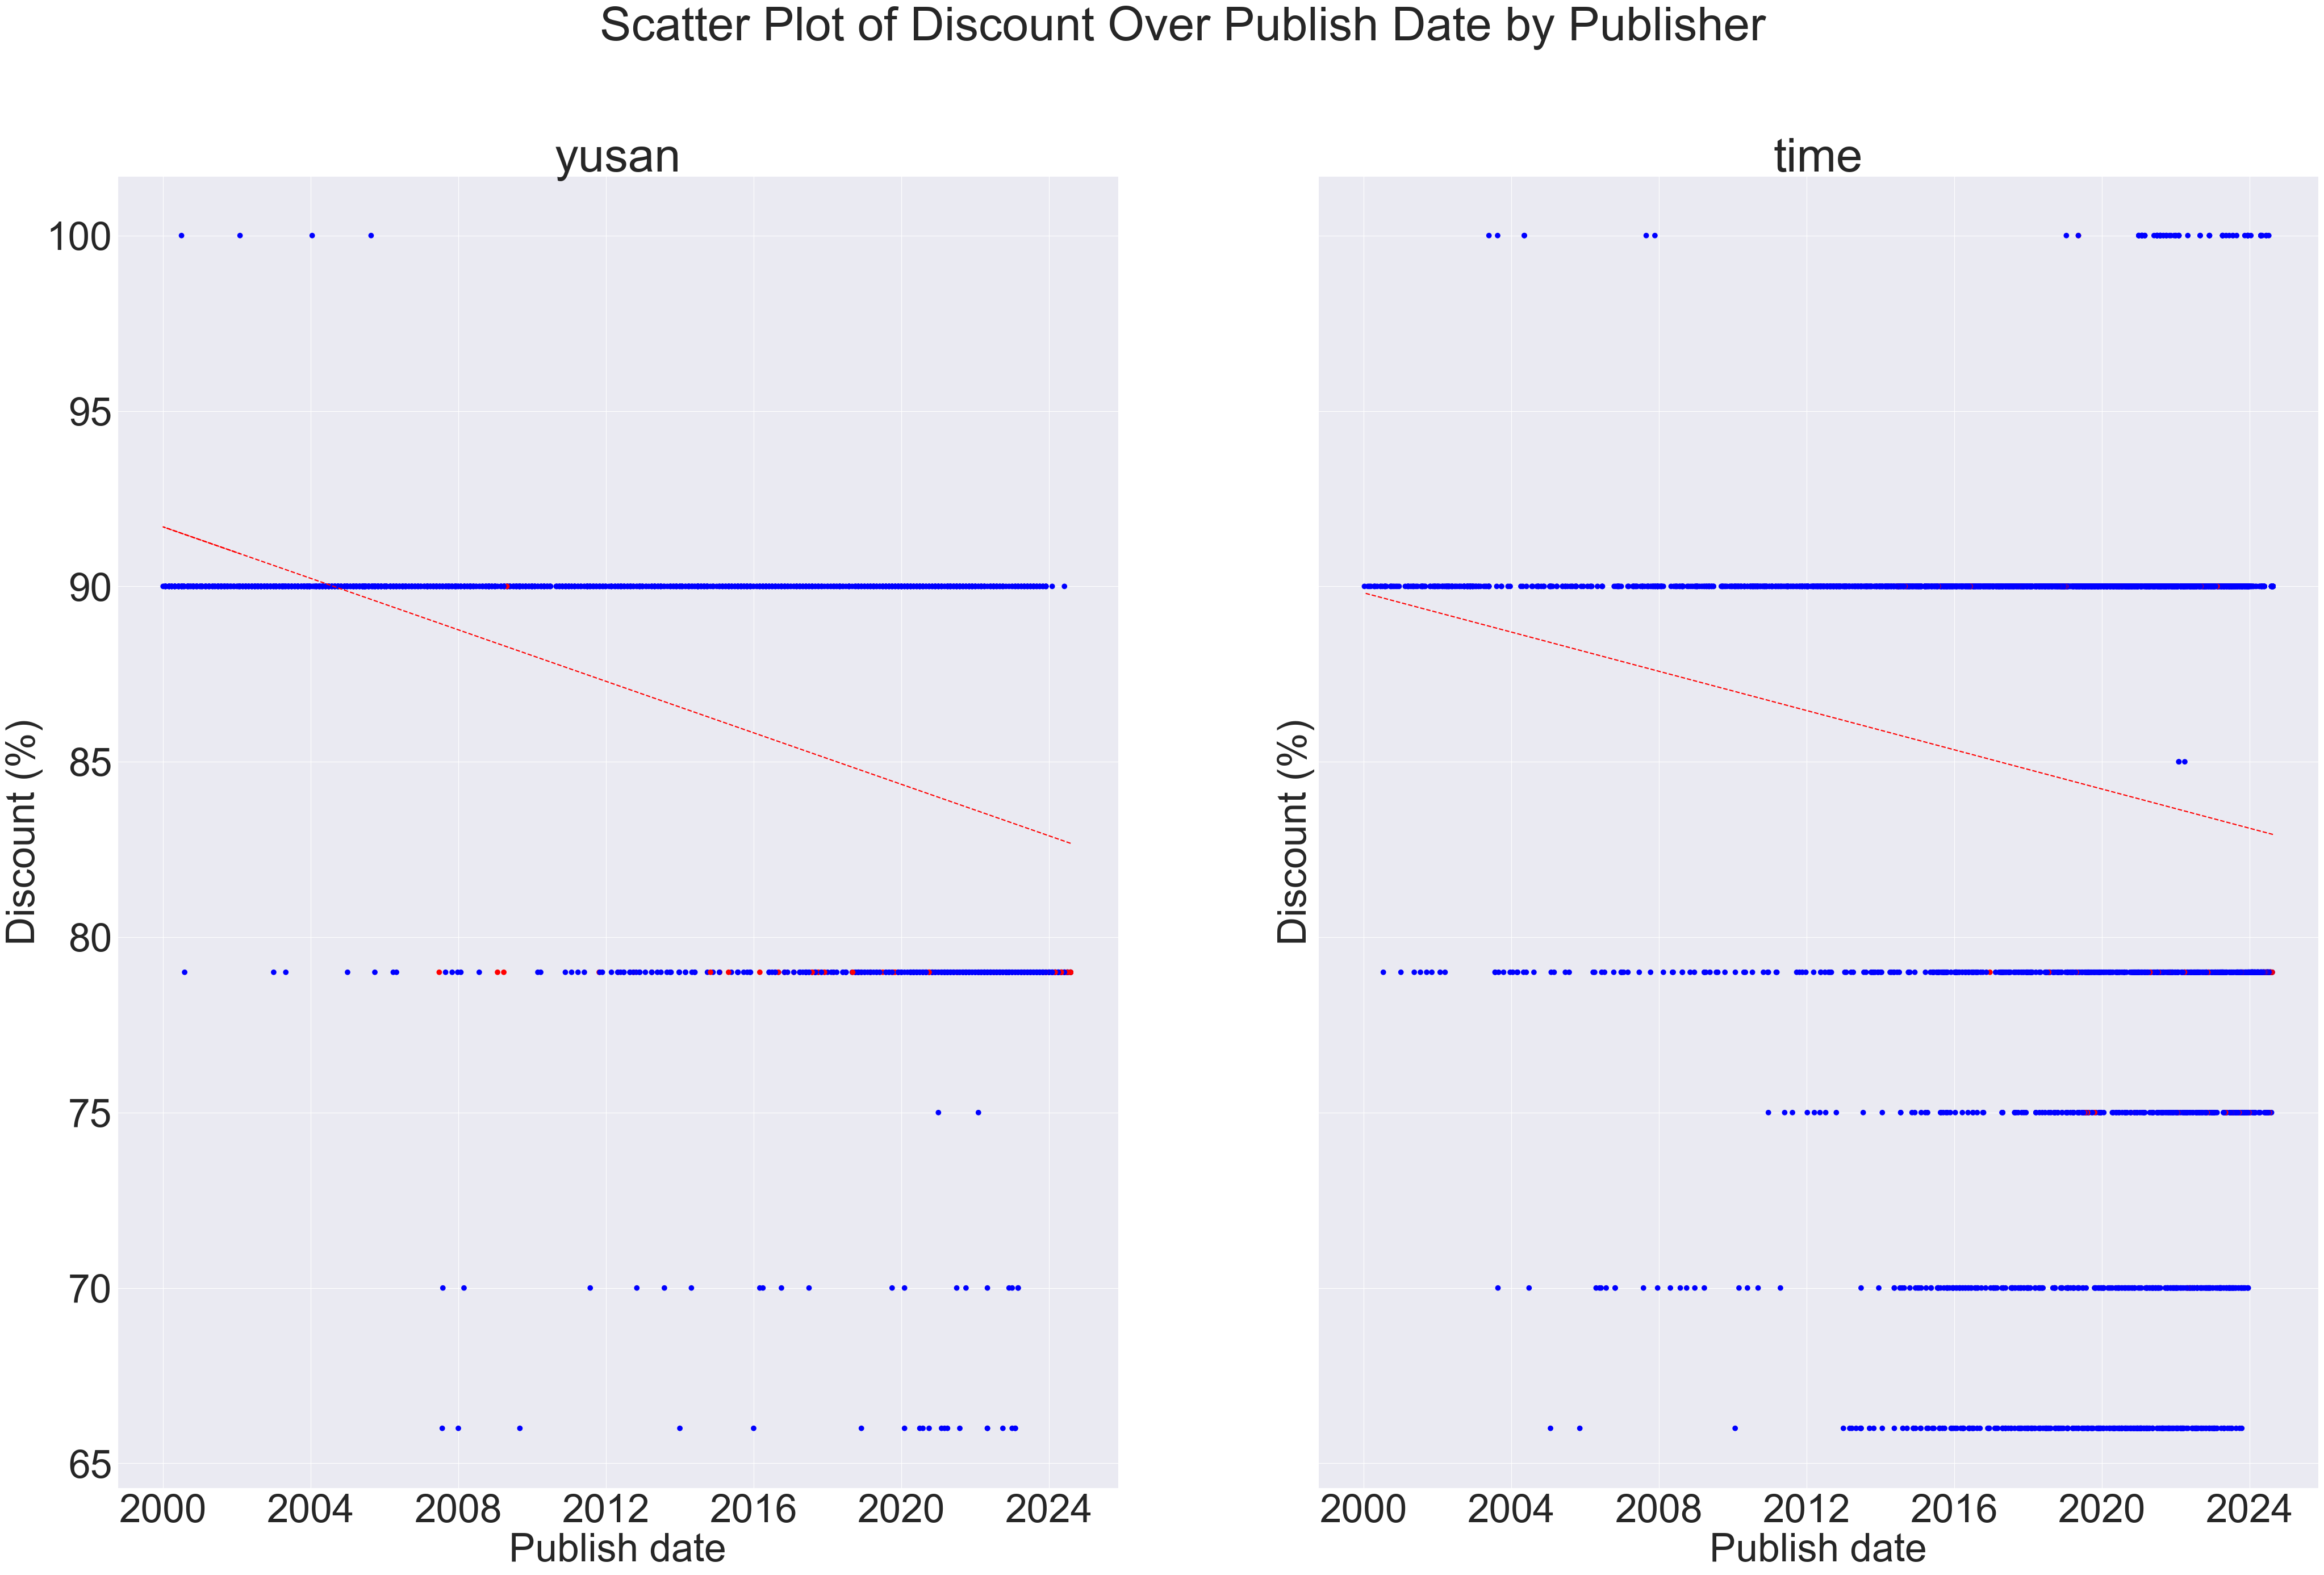

In [208]:
fig,axs = plt.subplots(1,2,figsize=(50,30),sharex=True,sharey=True)
for i in range(2):
    df_ = ndfs[i][ndfs[i]['publishDate']>=datetime.datetime(2000,1,1)]
    df_ = df_[df_['electronic_version']==False]
    axs[i].scatter(df_['publishDate'],df_['discount'],c=df_['ispop'],cmap='bwr')
    axs[i].set_title(nlabels[i],fontsize=60)
    axs[i].tick_params(axis='both', which='major', labelsize=50)
    axs[i].set_xlabel("Publish date",fontsize=50)
    axs[i].set_ylabel("Discount (%)",fontsize=50)
    x = mdates.date2num(df_['publishDate'])
    y = df_['discount']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    axs[i].plot(x, p(x), "r--")
    """ fit line
    x = mdates.date2num(df_['publishDate'])
    y = df_['discount']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    axs[i//4,i%4].plot(x, p(x), "r--")
    """
# plt.show()
fig.suptitle("Scatter Plot of Discount Over Publish Date by Publisher",fontsize=60)
plt.savefig("./googleDocxPic/paper_publisher_discount.png")


In [209]:
yusanedf = pd.concat([ebookdfs[i] for i in range(6)])
timeedf = ebookdfs[6]
yusanedf['ispop'] = yusanedf['title'].isin(populist)
timeedf['ispop'] = timeedf['title'].isin(populist)
nedfs = [yusanedf,timeedf]
nelabels = ['yusan','time']

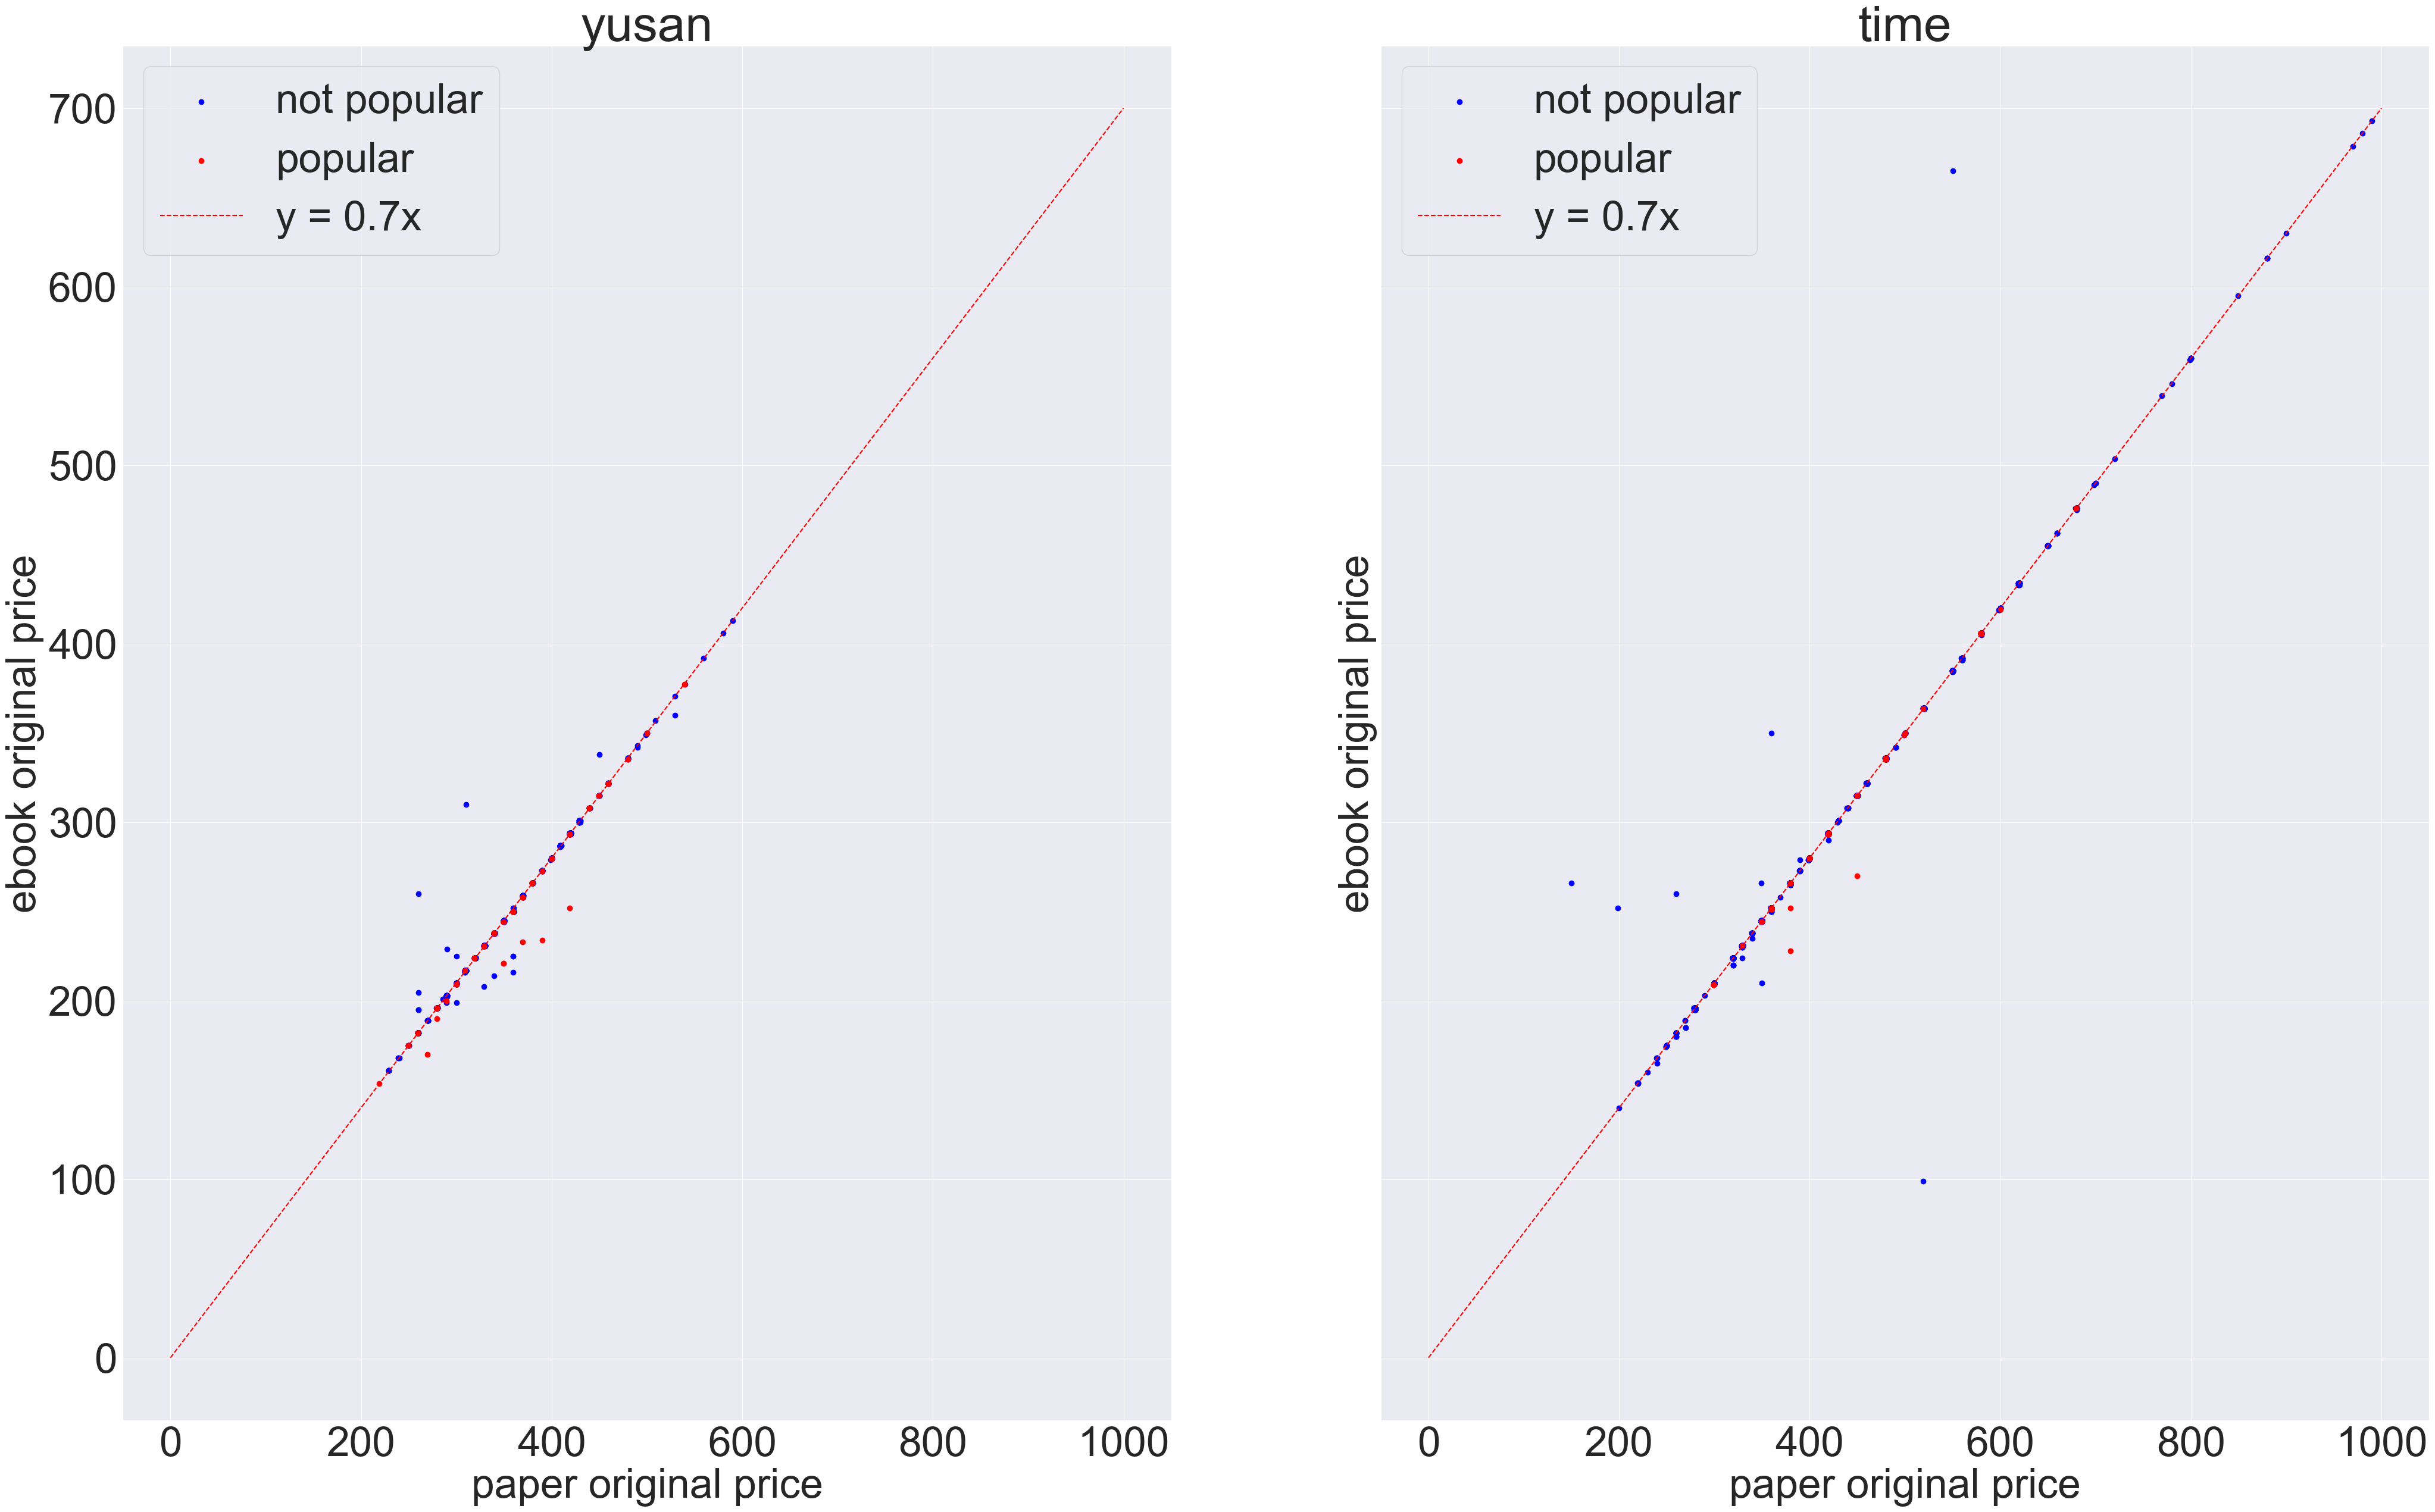

In [210]:
ig, axs = plt.subplots(1,2,figsize=(50, 30),sharex=True,sharey=True)
for i in range(2):
    _ = nedfs[i][nedfs[i]['original_price']<700]
    temp1 = _[_['ispop'] == False]
    temp2 = _[_['ispop'] == True]
    axs[i].scatter(temp1['paper_original_price'],temp1['original_price'],c = 'blue',label = 'not popular')
    axs[i].scatter(temp2['paper_original_price'],temp2['original_price'],c = 'red',label = 'popular')
    x = np.linspace(0,1000,100)
    axs[i].plot(x,x*0.7,'r--',label = 'y = 0.7x')
    axs[i].set_title(nelabels[i], fontsize=60)
    axs[i].tick_params(axis='both', which='major', labelsize=50)  # Change the size of the numbers on the axes
    axs[i].set_xlabel("paper original price",fontsize=50)
    axs[i].set_ylabel("ebook original price",fontsize=50)
    axs[i].legend(fontsize=50)
    
fig.suptitle('Paper Book Original Price Verses Ebook Original Price', fontsize=60)
plt.savefig("./googleDocxPic/ebook_ver_publisher_discount_on_origion_price_rate_by_original_price_scatter.png")

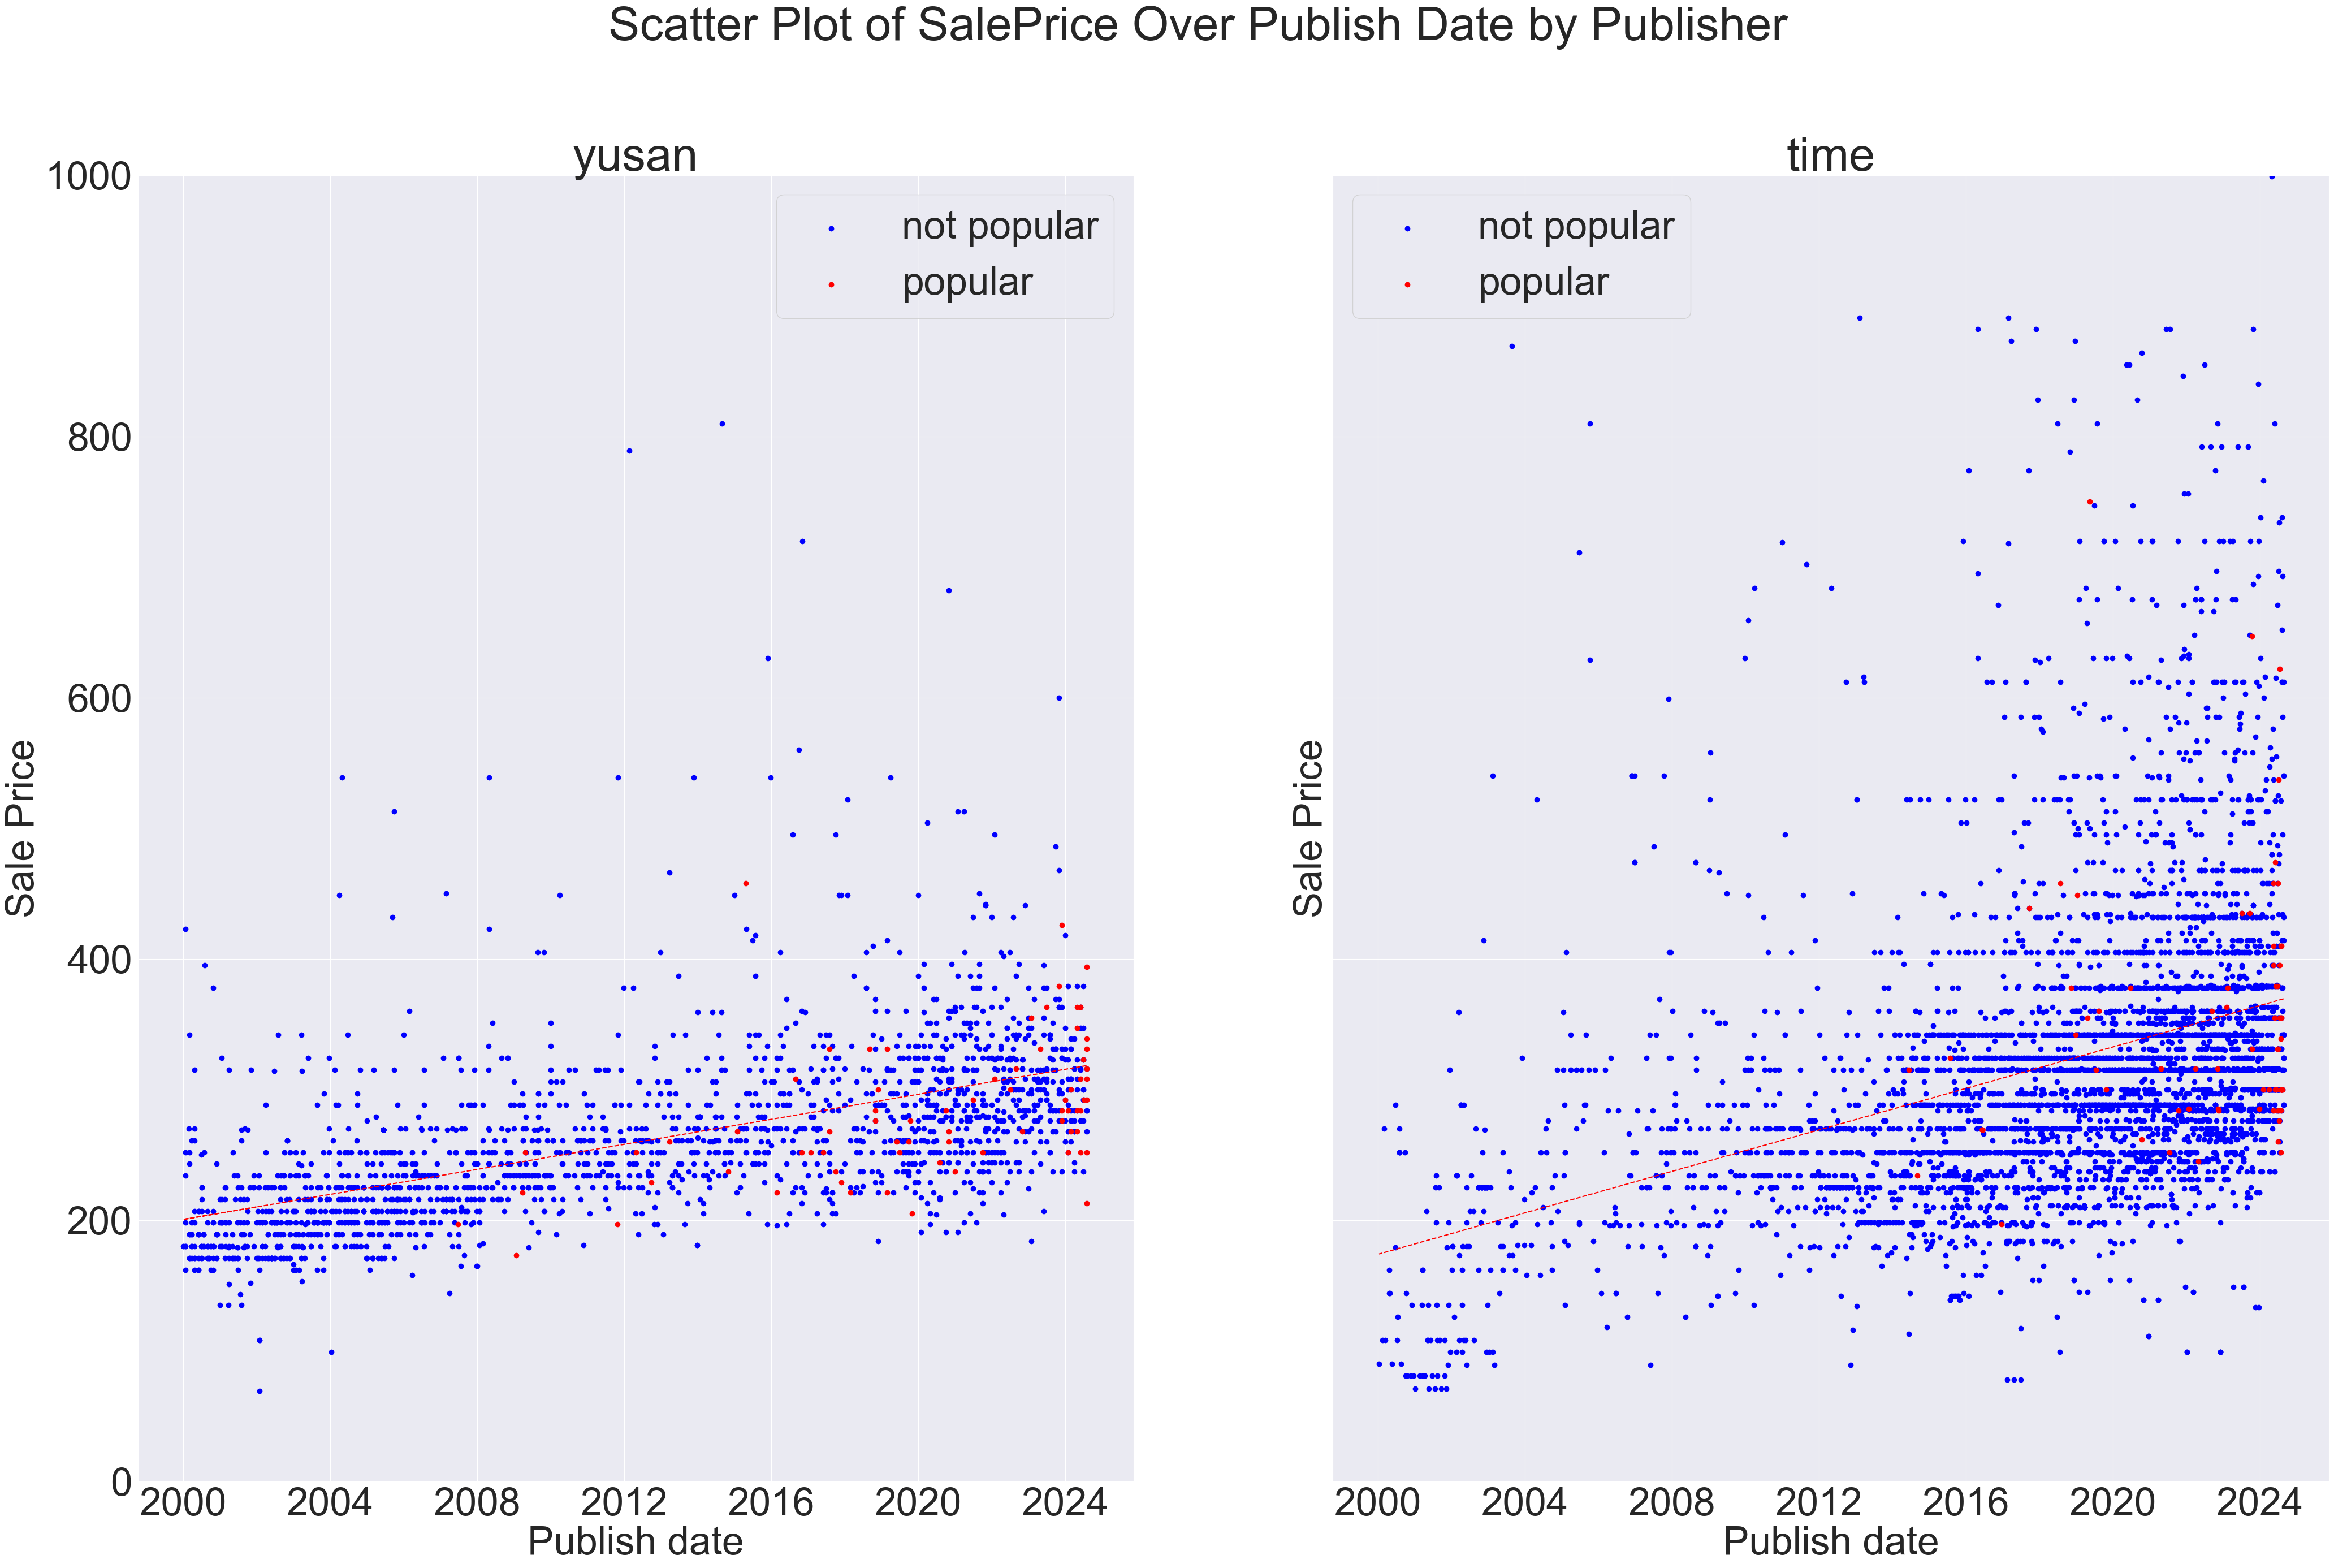

In [211]:
fig,axs = plt.subplots(1,2,figsize=(50,30),sharex=True,sharey=True)
for i in range(2):
    df_ = ndfs[i][ndfs[i]['publishDate']>=datetime.datetime(2000,1,1)]
    df_ = df_[df_['electronic_version']==False]
    df_['price'] = df_['price'].astype(float)
    df_ = df_[df_['original_price']<1000]
    df1 = df_[df_['ispop']==True]
    df2 = df_[df_['ispop']==False]
    axs[i].scatter(df2['publishDate'],df2['price'],c = 'blue',label = 'not popular')
    axs[i].scatter(df1['publishDate'],df1['price'],c = 'red',label = 'popular')
    axs[i].set_title(nlabels[i],fontsize=60)
    axs[i].tick_params(axis='both', which='major', labelsize=50)
    axs[i].set_xlabel("Publish date",fontsize=50)
    axs[i].set_ylabel("Sale Price",fontsize=50)
    axs[i].set_ylim(0,1000)
    x = mdates.date2num(df_['publishDate'])
    y = df_['price']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    axs[i].plot(x, p(x), "r--")
    axs[i].legend(fontsize=50)
    """
    x = mdates.date2num(df1['publishDate'])
    y = df1['price']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    axs[i].plot(x, p(x), "r--",label = 'popular')
    x = mdates.date2num(df2['publishDate'])
    y = df2['price']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    axs[i].plot(x, p(x), "b--",label = 'not popular')
    axs[i].legend(fontsize=50)
    """
# plt.show()
fig.suptitle("Scatter Plot of SalePrice Over Publish Date by Publisher",fontsize=60)
plt.savefig("./googleDocxPic/paper_publisher_salePrice.png")

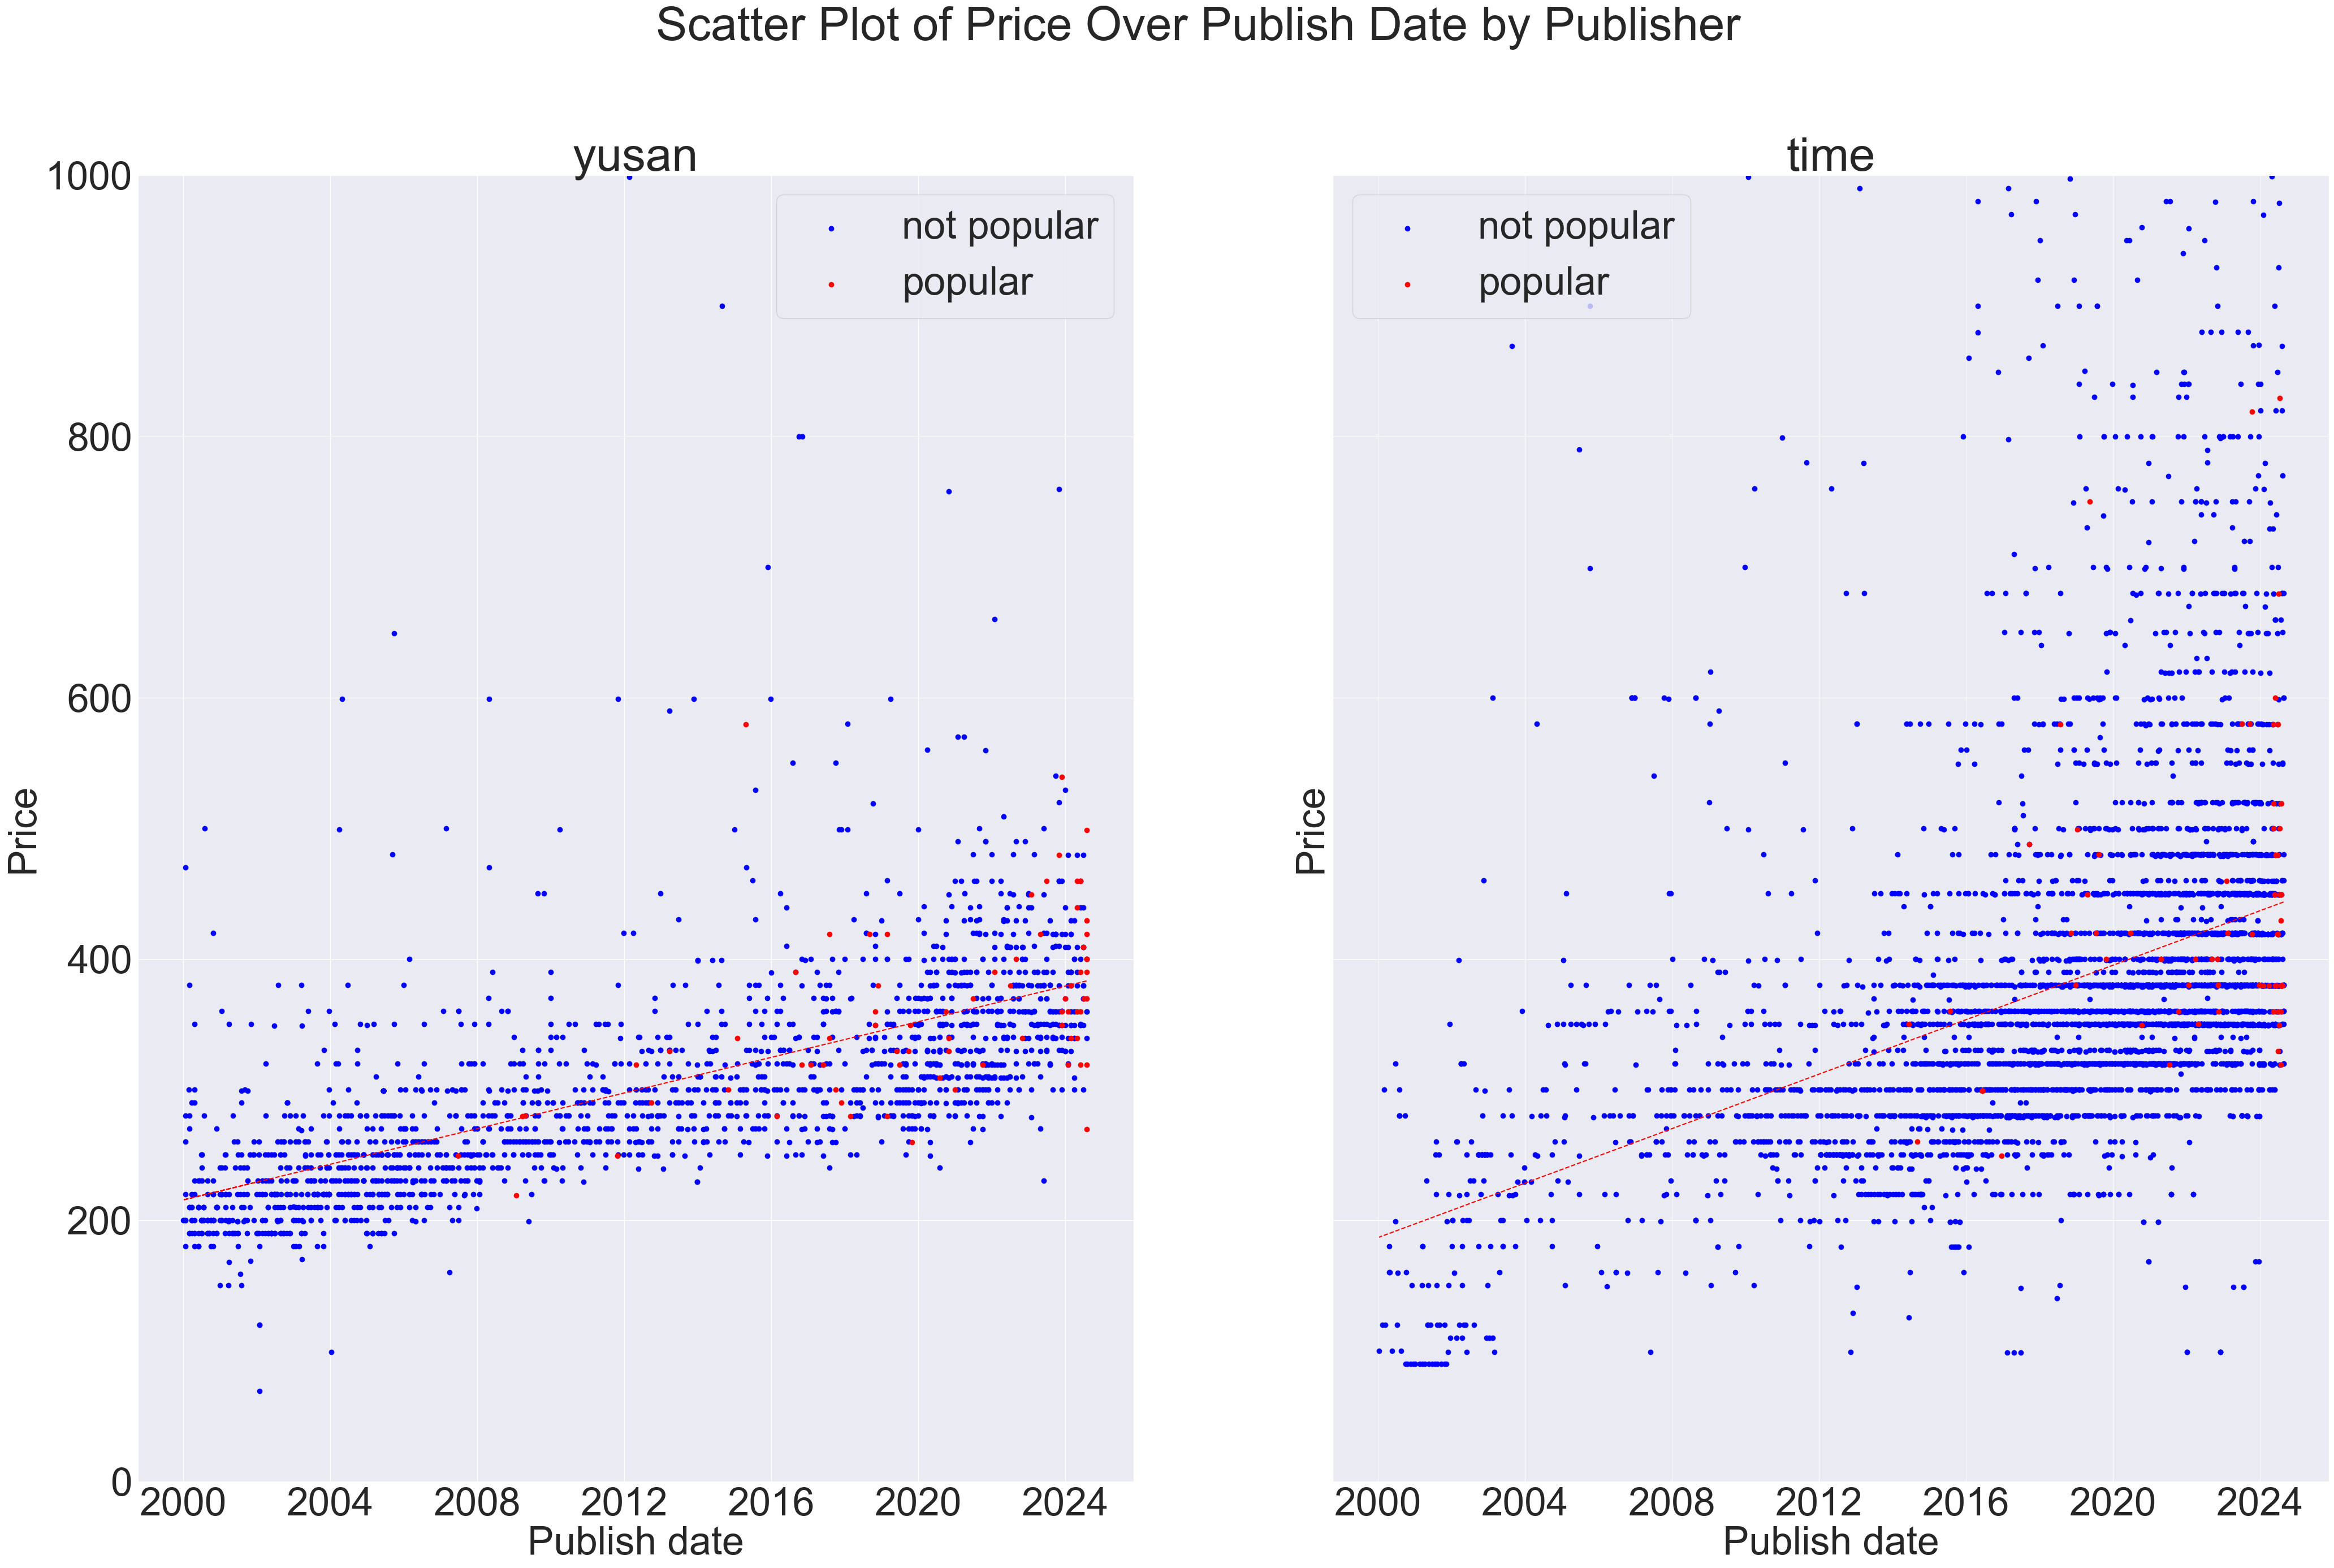

In [212]:
fig,axs = plt.subplots(1,2,figsize=(50,30),sharex=True,sharey=True)
for i in range(2):
    df_ = ndfs[i][ndfs[i]['publishDate']>=datetime.datetime(2000,1,1)]
    df_ = df_[df_['electronic_version']==False]
    df_['price'] = df_['price'].astype(float)
    df_ = df_[df_['original_price']<1000]
    df1 = df_[df_['ispop']==True]
    df2 = df_[df_['ispop']==False]
    axs[i].scatter(df2['publishDate'],df2['original_price'],c = 'b',label = 'not popular')
    axs[i].scatter(df1['publishDate'],df1['original_price'],c = 'r',label = 'popular')
    axs[i].set_title(nlabels[i],fontsize=60)
    axs[i].tick_params(axis='both', which='major', labelsize=50)
    axs[i].set_xlabel("Publish date",fontsize=50)
    axs[i].set_ylabel("Price",fontsize=50)
    axs[i].set_ylim(0,1000)
    x = mdates.date2num(df_['publishDate'])
    y = df_['original_price']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    axs[i].plot(x, p(x), "r--")
    axs[i].legend(fontsize=50)
    """ fit line
    x = mdates.date2num(df_['publishDate'])
    y = df_['discount']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    axs[i//4,i%4].plot(x, p(x), "r--")
    """
# plt.show()
fig.suptitle("Scatter Plot of Price Over Publish Date by Publisher",fontsize=60)
plt.savefig("./googleDocxPic/paper_publisher_Price.png")

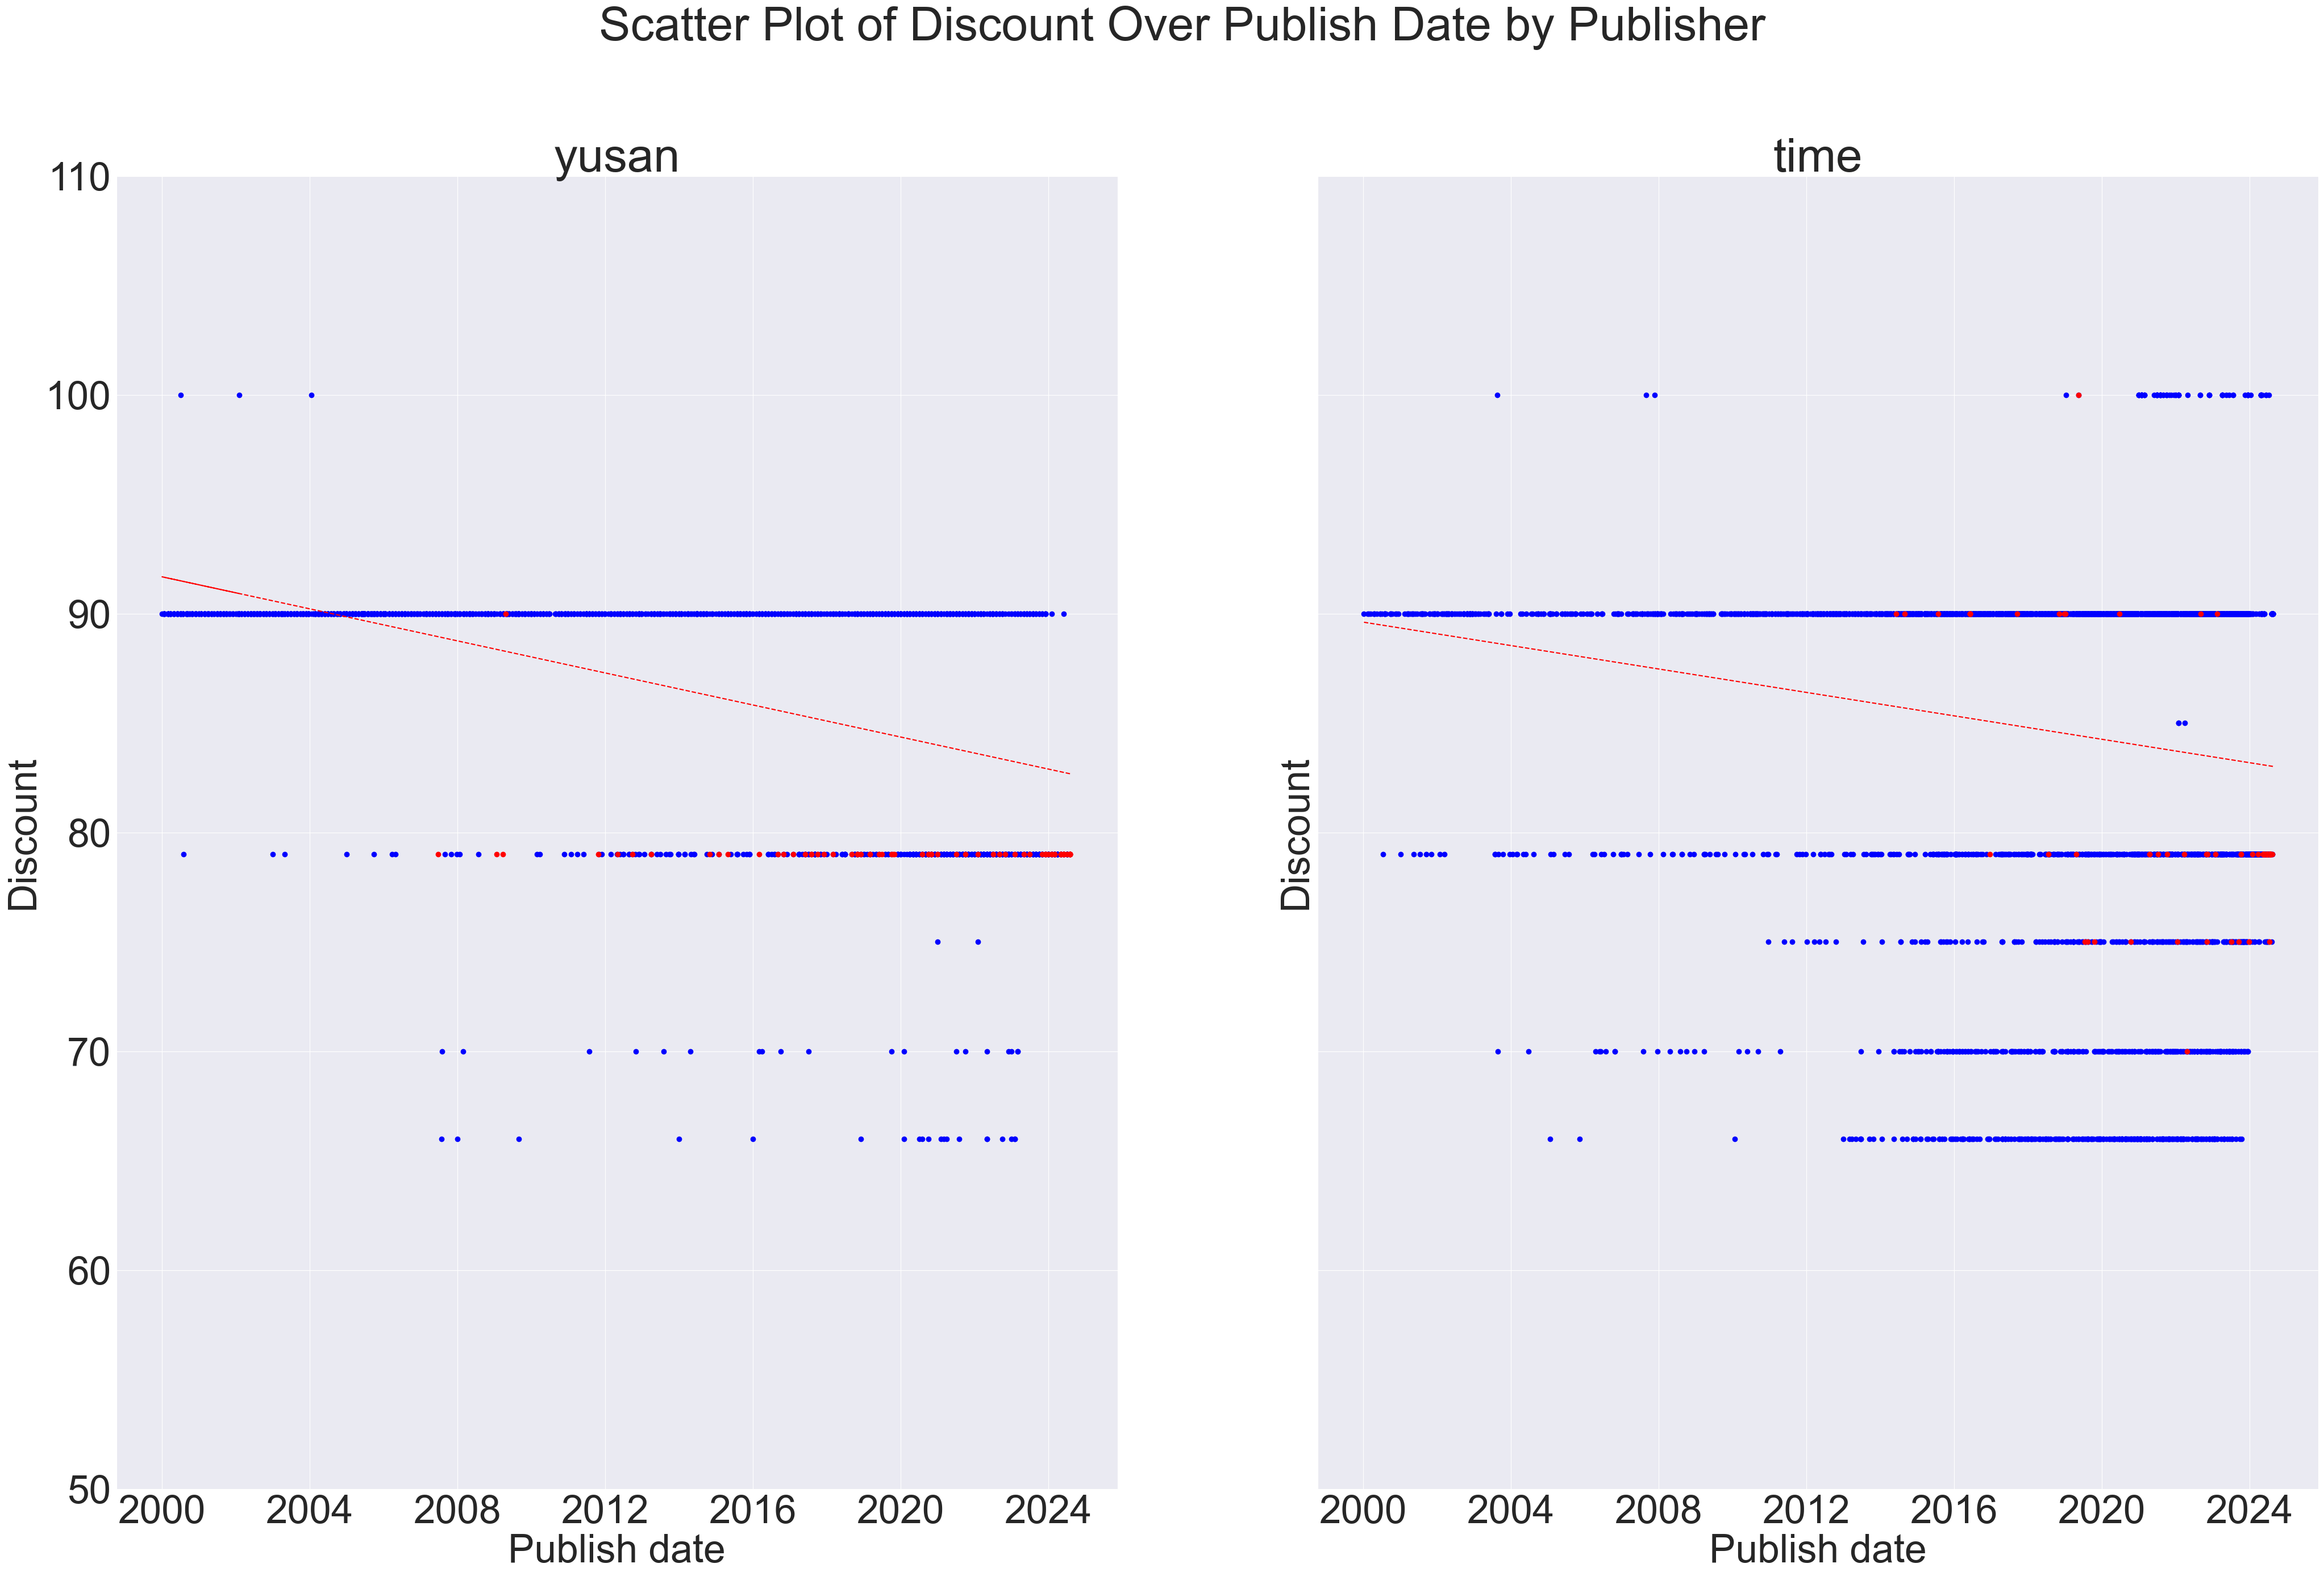

In [213]:
fig,axs = plt.subplots(1,2,figsize=(50,30),sharex=True,sharey=True)
for i in range(2):
    df_ = ndfs[i][ndfs[i]['publishDate']>=datetime.datetime(2000,1,1)]
    df_ = df_[df_['electronic_version']==False]
    df_['price'] = df_['price'].astype(float)
    df_ = df_[df_['original_price']<1000]
    df1 = df_[df_['ispop']==True]
    df2 = df_[df_['ispop']==False]
    axs[i].scatter(df2['publishDate'],df2['discount'],c = 'b',label = 'not popular')
    axs[i].scatter(df1['publishDate'],df1['discount'],c = 'r',label = 'popular')
    axs[i].set_title(nlabels[i],fontsize=60)
    axs[i].tick_params(axis='both', which='major', labelsize=50)
    axs[i].set_xlabel("Publish date",fontsize=50)
    axs[i].set_ylabel("Discount",fontsize=50)
    axs[i].set_ylim(50,110)
    x = mdates.date2num(df_['publishDate'])
    y = df_['discount']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    axs[i].plot(x, p(x), "r--")
    """ fit line
    x = mdates.date2num(df_['publishDate'])
    y = df_['discount']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    axs[i//4,i%4].plot(x, p(x), "r--")
    """
# plt.show()
fig.suptitle("Scatter Plot of Discount Over Publish Date by Publisher",fontsize=60)
plt.savefig("./googleDocxPic/paper_publisher_discount.png")

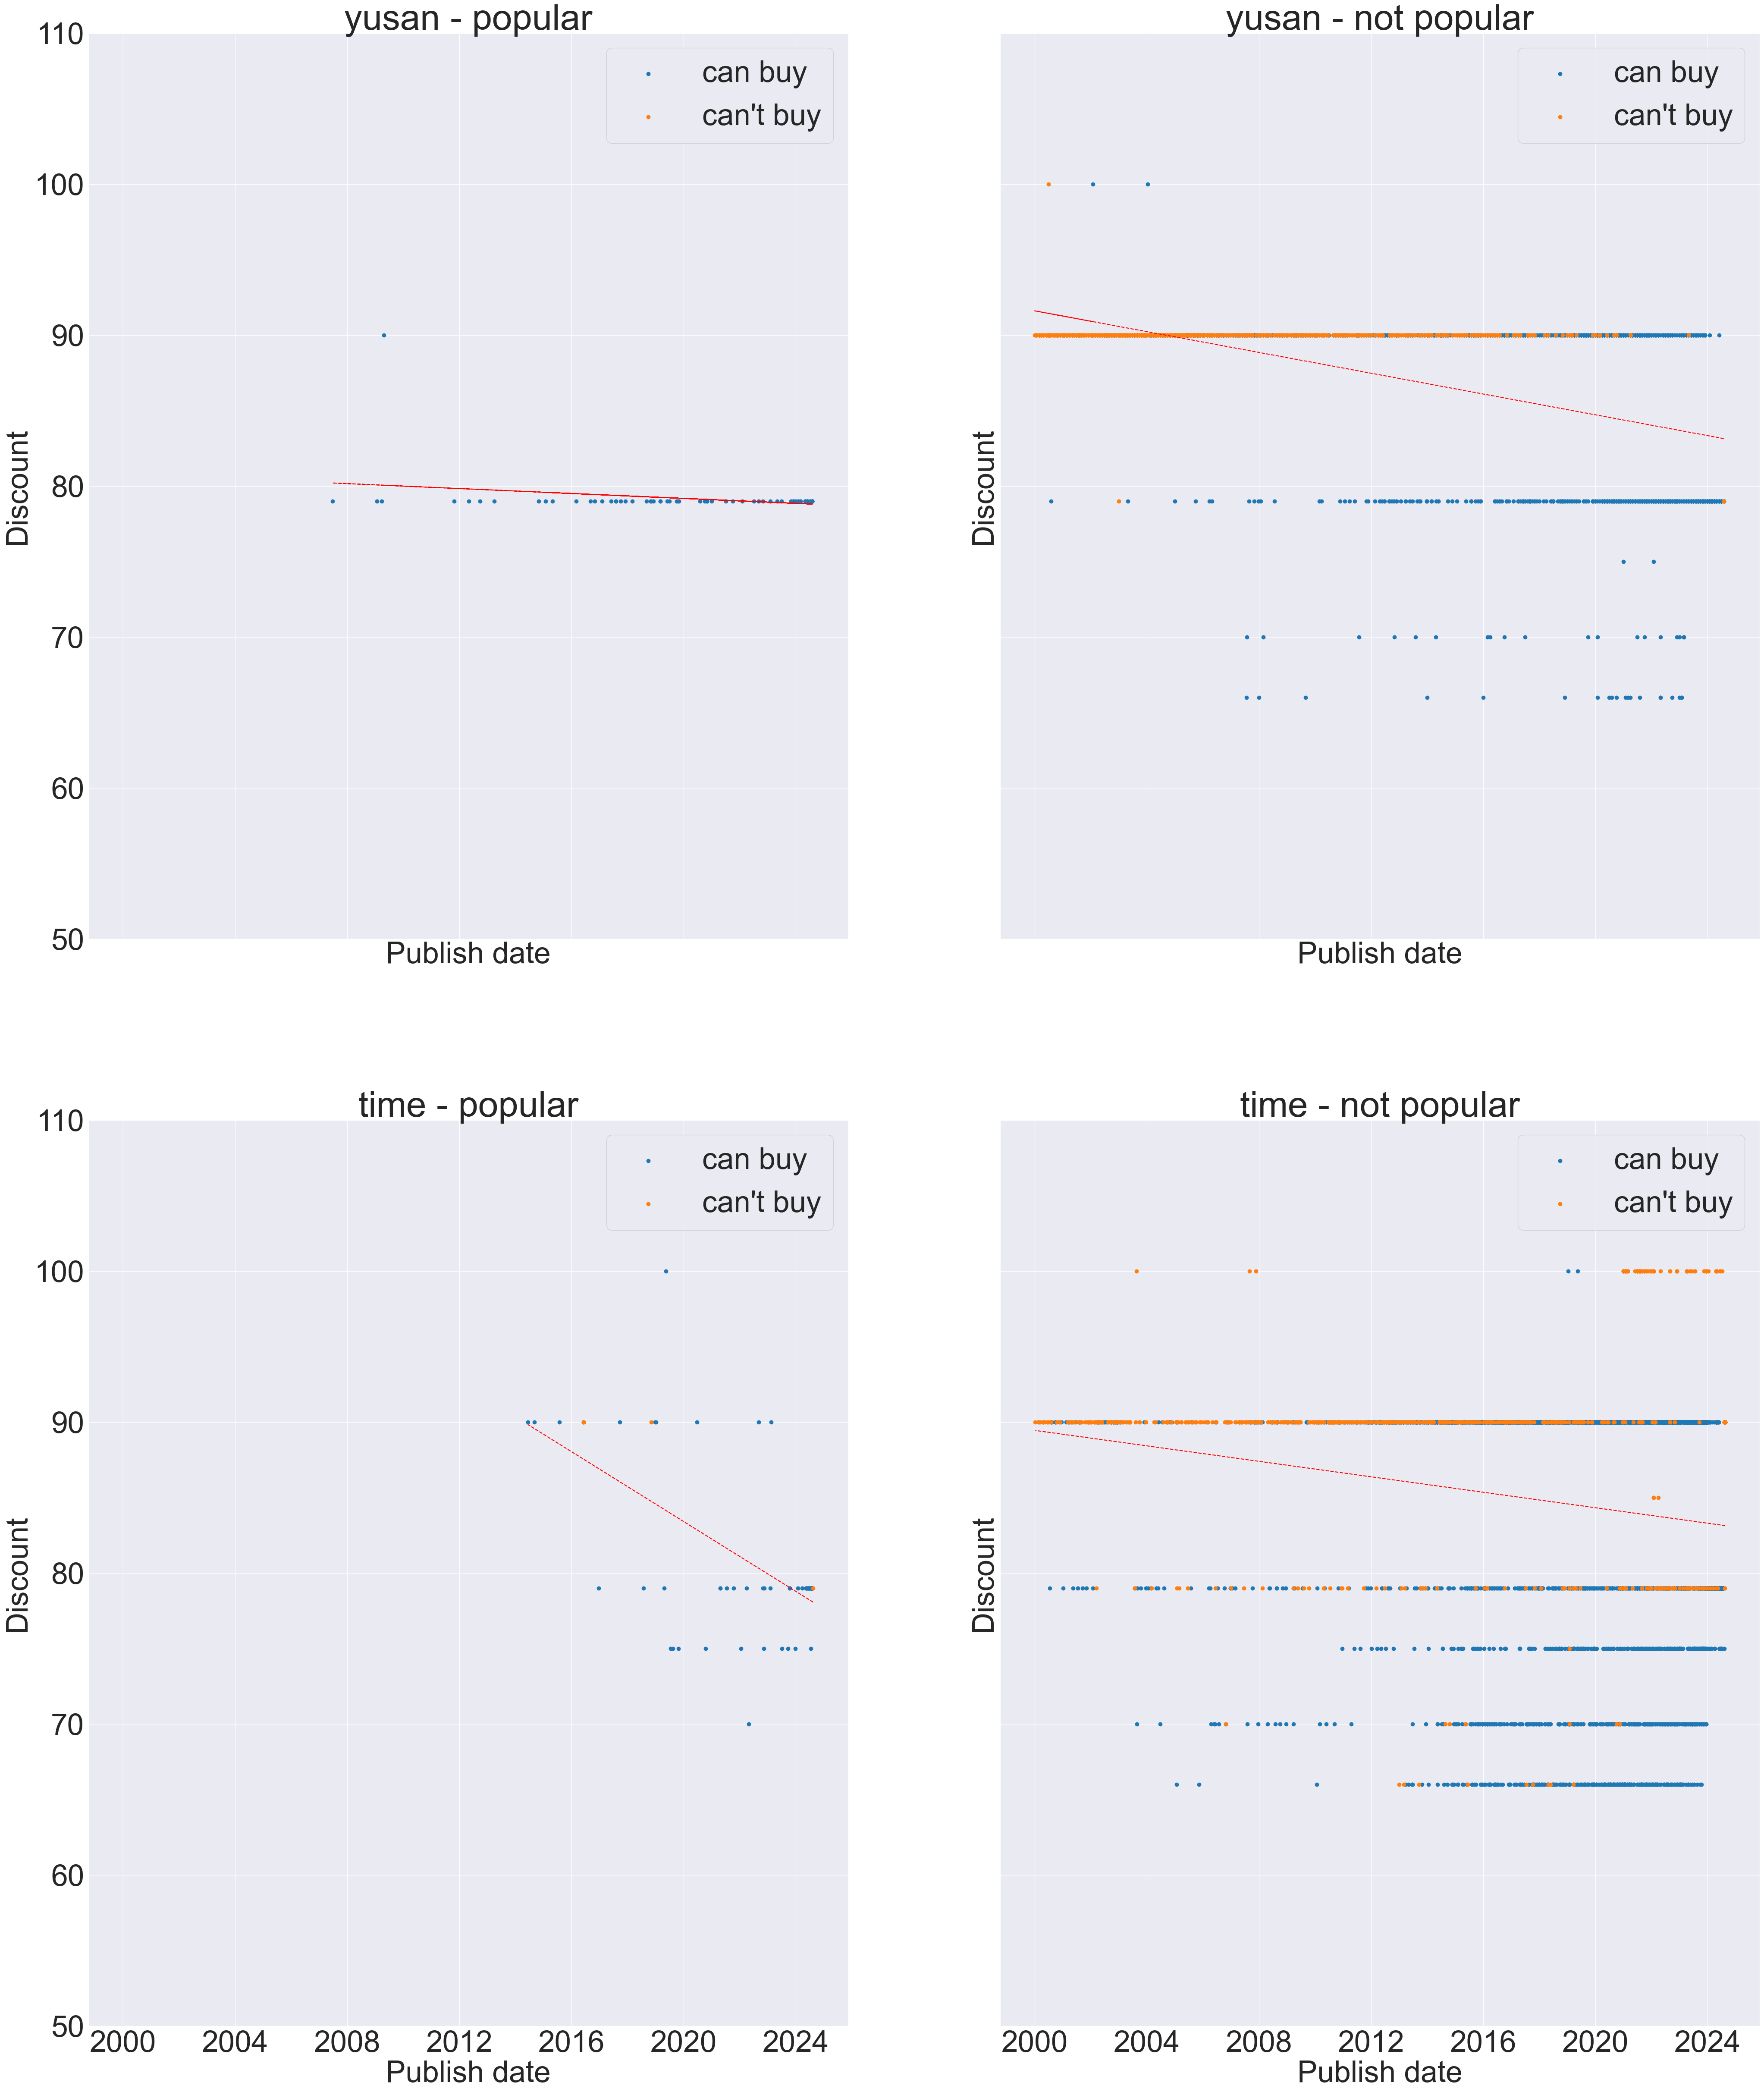

In [214]:
npop = ['popular','not popular']
fig,axs = plt.subplots(2,2,figsize=(50,60),sharex=True,sharey=True)
for i in range(4):
    dftemp = []
    df_ = ndfs[i//2][ndfs[i//2]['publishDate']>=datetime.datetime(2000,1,1)]
    df_ = df_[df_['electronic_version']==False]
    df_['price'] = df_['price'].astype(float)
    df_ = df_[df_['original_price']<1000]
    dftemp.append(df_[df_['ispop']==True])
    dftemp.append(df_[df_['ispop']==False])
    x = mdates.date2num(dftemp[i%2]['publishDate'])
    y = dftemp[i%2]['discount']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    axs[i//2][i%2].plot(x, p(x), "r--")
    _dftemp = []
    _dftemp.append([dftemp[0][dftemp[0]['buyable'] == True],dftemp[0][dftemp[0]['buyable'] == False]])
    _dftemp.append([dftemp[1][dftemp[1]['buyable'] == True],dftemp[1][dftemp[1]['buyable'] == False]])
    axs[i//2][i%2].scatter(_dftemp[i%2][0]['publishDate'],_dftemp[i%2][0]['discount'],label = 'can buy')
    axs[i//2][i%2].scatter(_dftemp[i%2][1]['publishDate'],_dftemp[i%2][1]['discount'],label = "can't buy")
    axs[i//2][i%2].set_title(f"{nlabels[i//2]} - {npop[i%2]}",fontsize=60)
    axs[i//2][i%2].tick_params(axis='both', which='major', labelsize=50)
    axs[i//2][i%2].set_xlabel("Publish date",fontsize=50)
    axs[i//2][i%2].set_ylabel("Discount",fontsize=50)
    axs[i//2][i%2].set_ylim(50,110)
    axs[i//2][i%2].legend(fontsize = 50)
    """ fit line
    x = mdates.date2num(df_['publishDate'])
    y = df_['discount']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    axs[i//4,i%4].plot(x, p(x), "r--")
    """
plt.savefig("./googleDocxPic/paper_publisher_discount_sepByPop_WithBuyable.png")

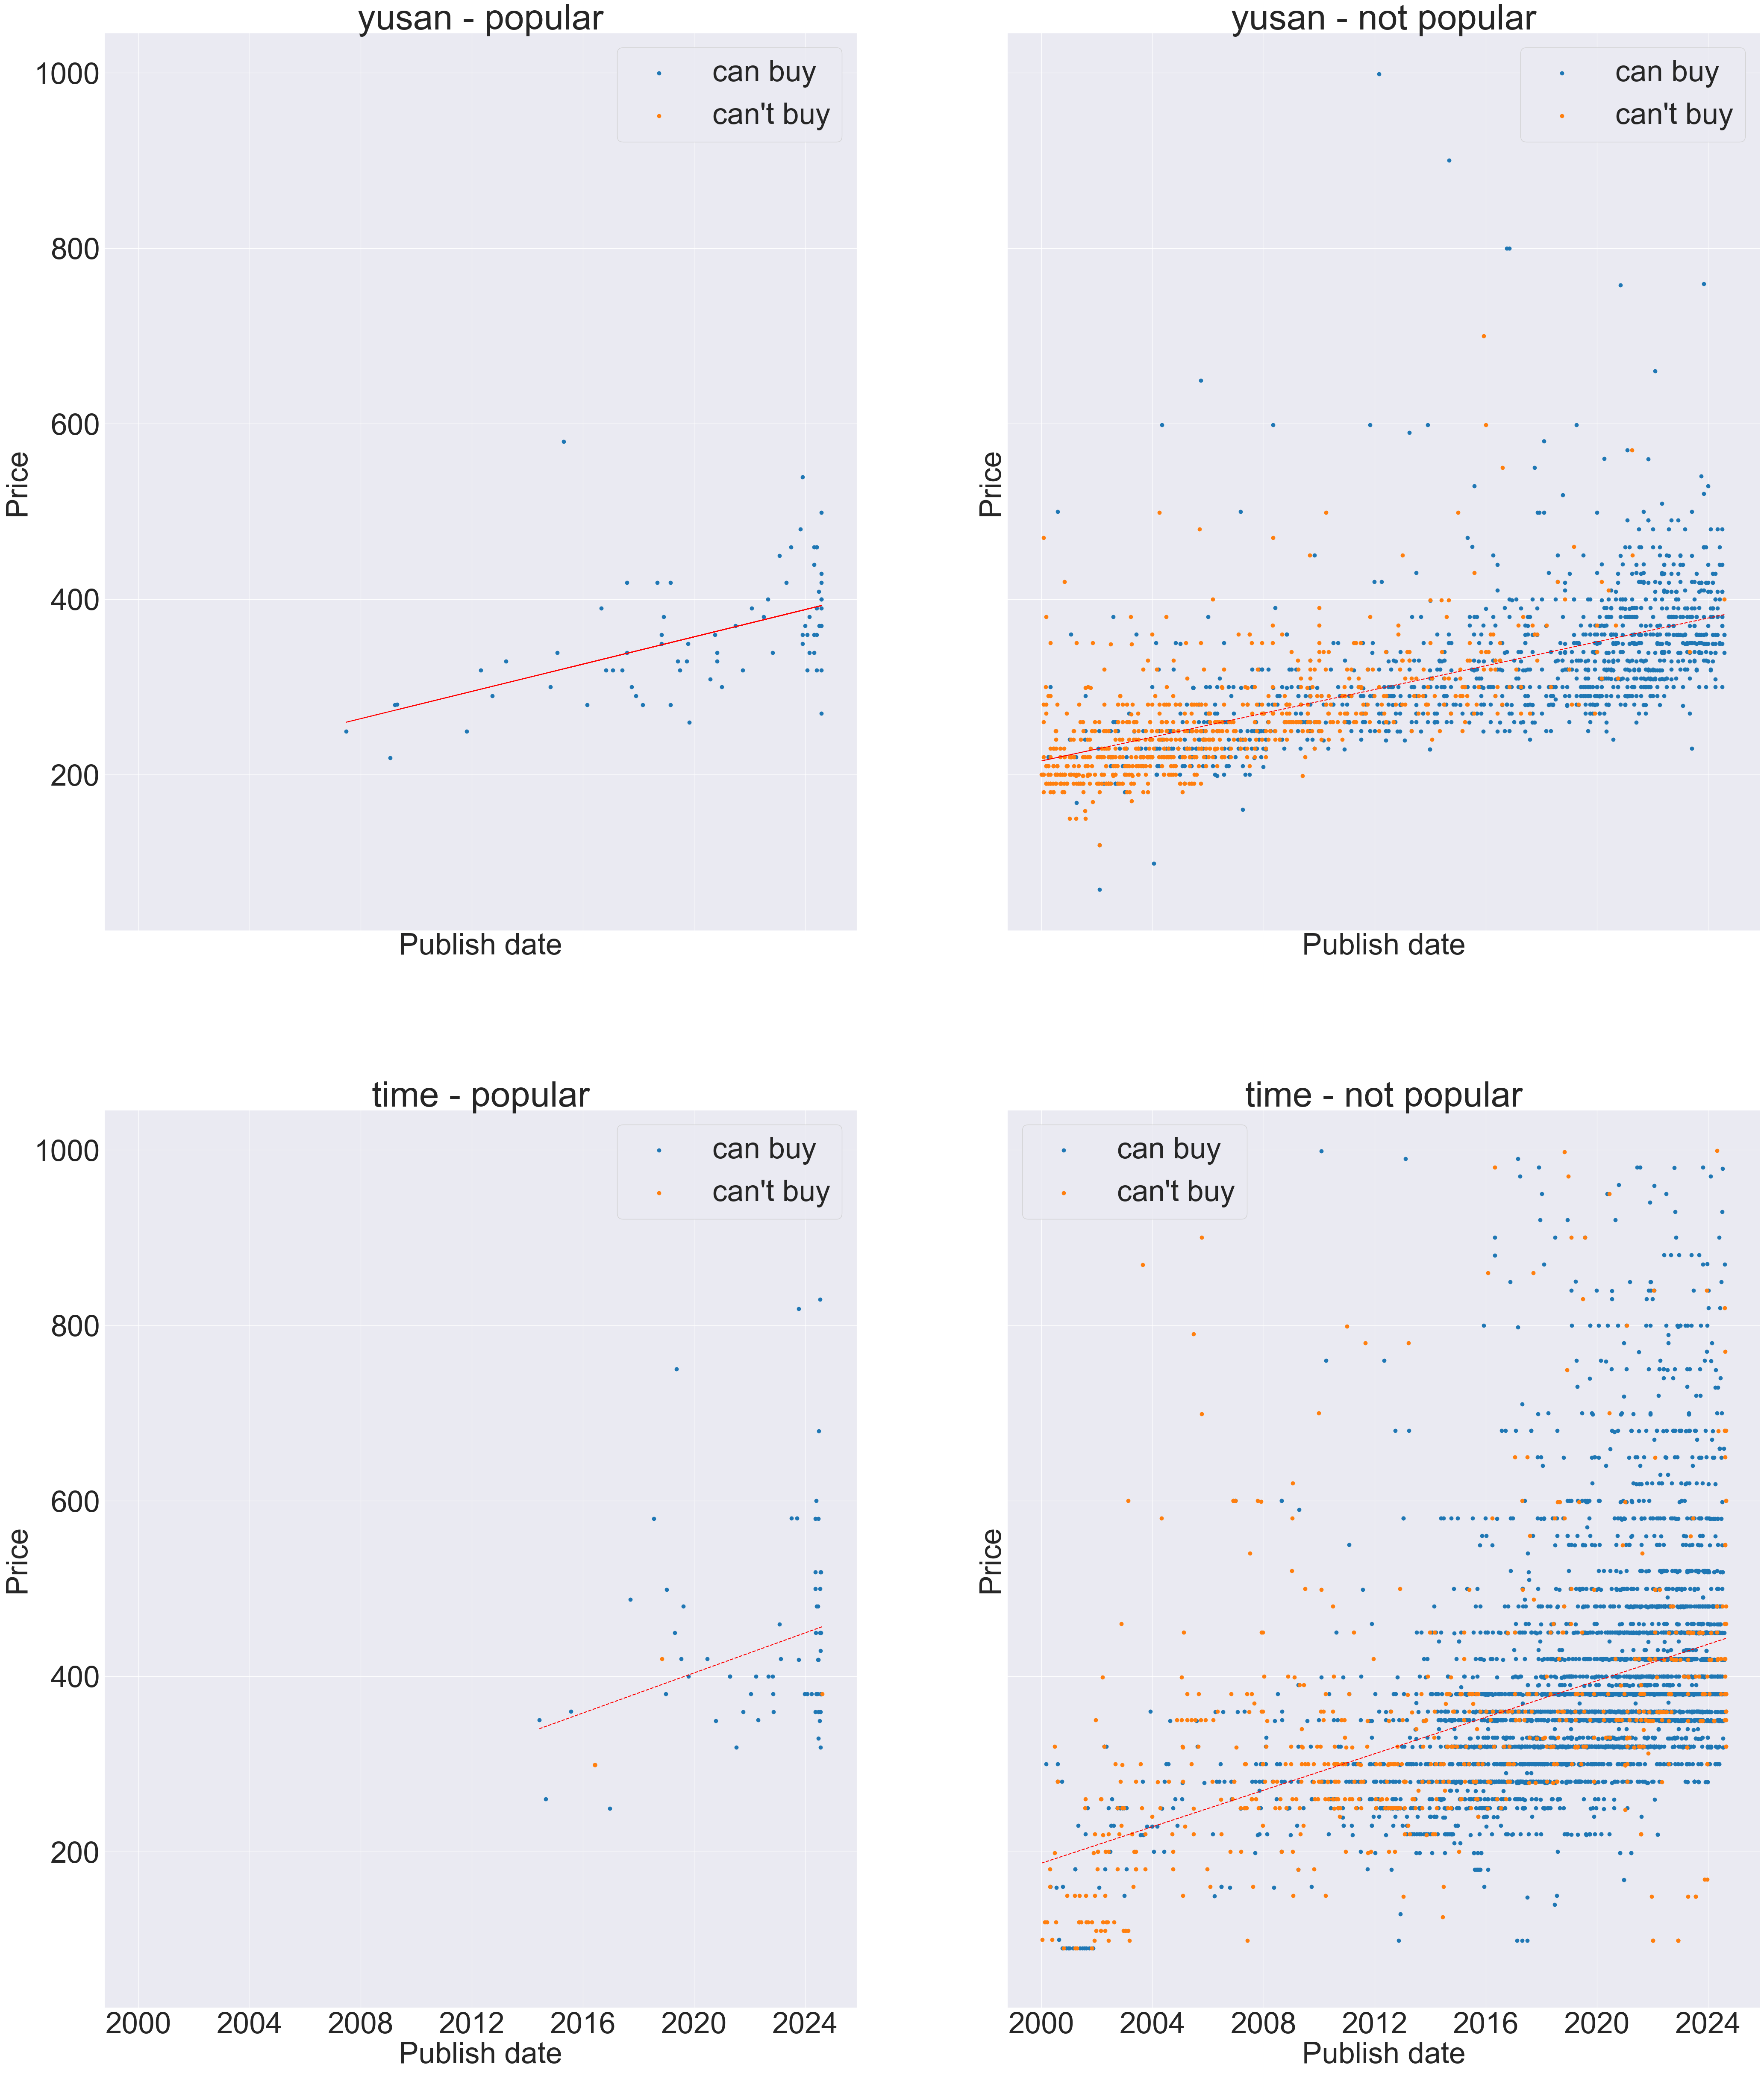

In [215]:
fig,axs = plt.subplots(2,2,figsize=(50,60),sharex=True,sharey=True)
for i in range(4):
    dftemp = []
    df_ = ndfs[i//2][ndfs[i//2]['publishDate']>=datetime.datetime(2000,1,1)]
    df_ = df_[df_['electronic_version']==False]
    df_['price'] = df_['price'].astype(float)
    df_ = df_[df_['original_price']<1000]
    dftemp.append(df_[df_['ispop']==True])
    dftemp.append(df_[df_['ispop']==False])
    _dftemp = []
    _dftemp.append([dftemp[0][dftemp[0]['buyable'] == True],dftemp[0][dftemp[0]['buyable'] == False]])
    _dftemp.append([dftemp[1][dftemp[1]['buyable'] == True],dftemp[1][dftemp[1]['buyable'] == False]])
    axs[i//2][i%2].scatter(_dftemp[i%2][0]['publishDate'],_dftemp[i%2][0]['original_price'],label = 'can buy')
    axs[i//2][i%2].scatter(_dftemp[i%2][1]['publishDate'],_dftemp[i%2][1]['original_price'],label = "can't buy")
    axs[i//2][i%2].set_title(f"{nlabels[i//2]} - {npop[i%2]}",fontsize=60)
    axs[i//2][i%2].tick_params(axis='both', which='major', labelsize=50)
    axs[i//2][i%2].set_xlabel("Publish date",fontsize=50)
    axs[i//2][i%2].set_ylabel("Price",fontsize=50)
    x = mdates.date2num(dftemp[i%2]['publishDate'])
    y = dftemp[i%2]['original_price']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    axs[i//2][i%2].plot(x, p(x), "r--")
    axs[i//2][i%2].legend(fontsize = 50)
    
    """ fit line
    x = mdates.date2num(df_['publishDate'])
    y = df_['discount']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    axs[i//4,i%4].plot(x, p(x), "r--")
    """
plt.savefig("./googleDocxPic/paper_publisher_price_sepByPop_withBuyable.png")

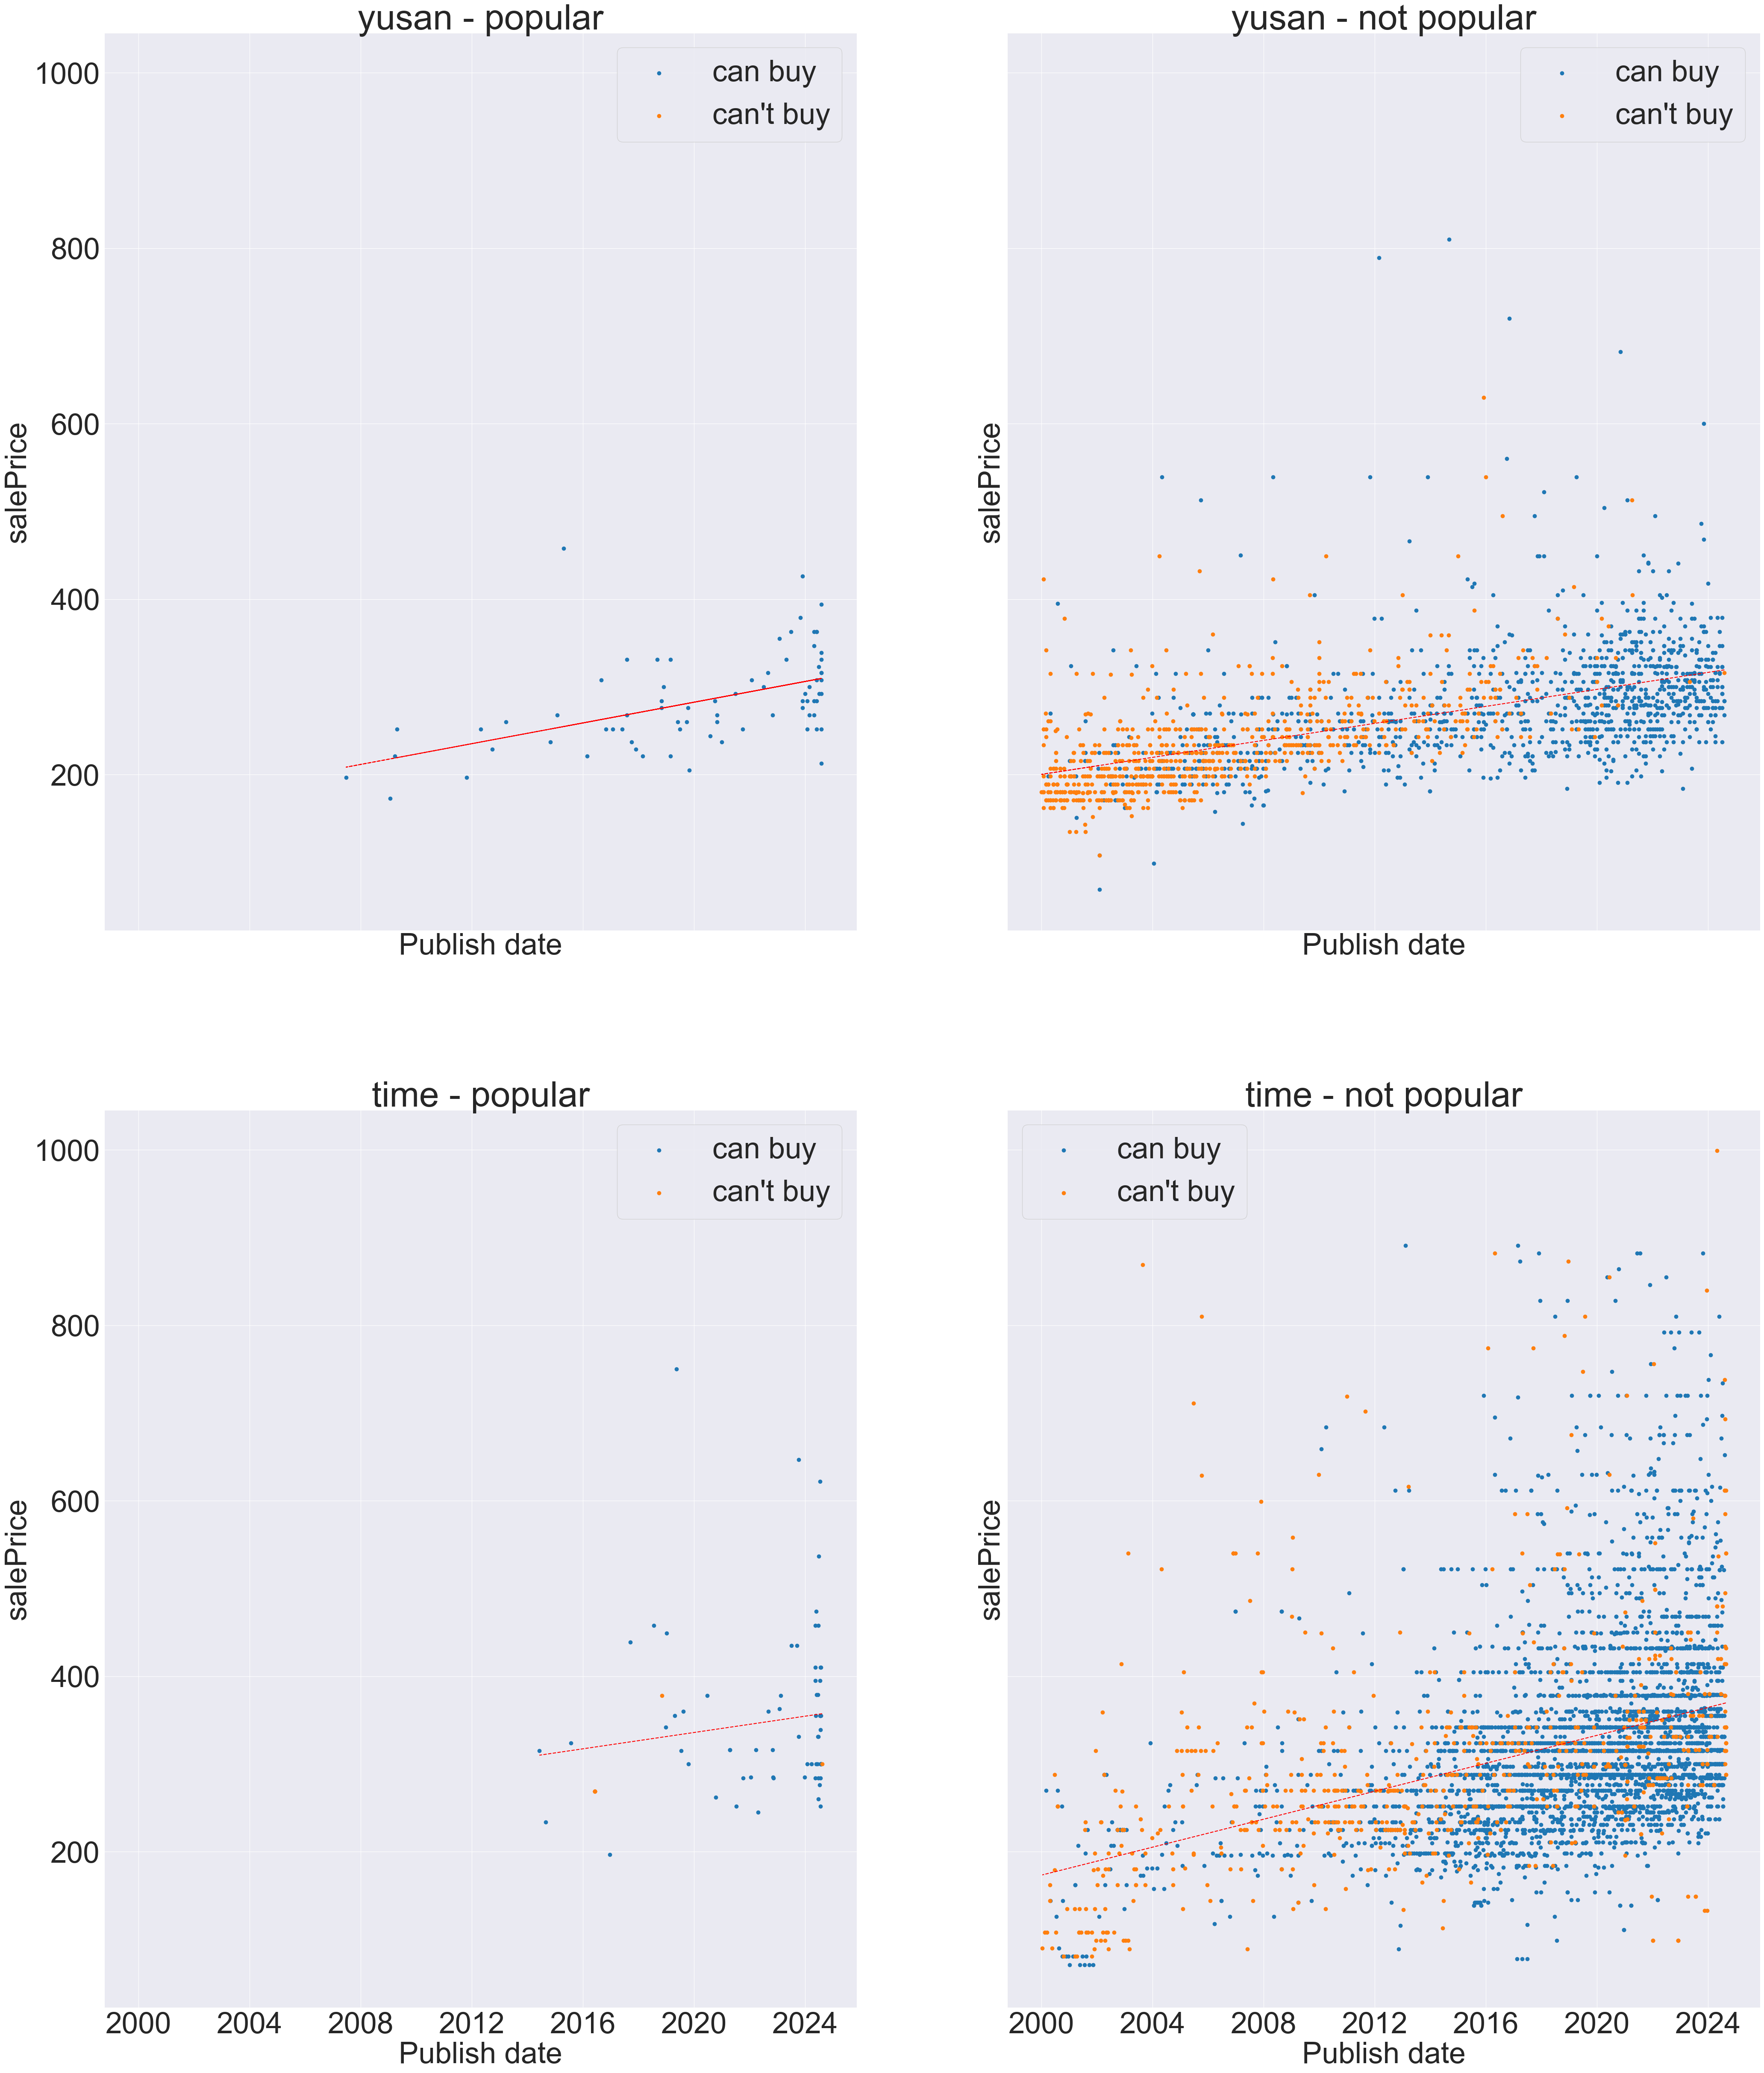

In [216]:
fig,axs = plt.subplots(2,2,figsize=(50,60),sharex=True,sharey=True)
for i in range(4):
    dftemp = []
    df_ = ndfs[i//2][ndfs[i//2]['publishDate']>=datetime.datetime(2000,1,1)]
    df_ = df_[df_['electronic_version']==False]
    df_['price'] = df_['price'].astype(float)
    df_ = df_[df_['original_price']<1000]
    dftemp.append(df_[df_['ispop']==True])
    dftemp.append(df_[df_['ispop']==False])
    _dftemp = []
    _dftemp.append([dftemp[0][dftemp[0]['buyable'] == True],dftemp[0][dftemp[0]['buyable'] == False]])
    _dftemp.append([dftemp[1][dftemp[1]['buyable'] == True],dftemp[1][dftemp[1]['buyable'] == False]])
    axs[i//2][i%2].scatter(_dftemp[i%2][0]['publishDate'],_dftemp[i%2][0]['price'],label = 'can buy')
    axs[i//2][i%2].scatter(_dftemp[i%2][1]['publishDate'],_dftemp[i%2][1]['price'],label = "can't buy")
    axs[i//2][i%2].set_title(f"{nlabels[i//2]} - {npop[i%2]}",fontsize=60)
    axs[i//2][i%2].tick_params(axis='both', which='major', labelsize=50)
    axs[i//2][i%2].set_xlabel("Publish date",fontsize=50)
    axs[i//2][i%2].set_ylabel("salePrice",fontsize=50)
    axs[i//2][i%2].legend()
    x = mdates.date2num(dftemp[i%2]['publishDate'])
    y = dftemp[i%2]['price']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    axs[i//2][i%2].plot(x, p(x), "r--")
    axs[i//2][i%2].legend(fontsize = 50)
    """ fit line
    x = mdates.date2num(df_['publishDate'])
    y = df_['discount']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    axs[i//4,i%4].plot(x, p(x), "r--")
    """
plt.savefig("./googleDocxPic/paper_publisher_salePrice_sepByPop_withbuyable.png")

(array([  20.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,   19.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    2.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,  485.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  193.,    0.,    0.,    0.,    0.,    0., 1810.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         471.]),
 array([ 66.  ,  66.34,  66.68,  67.02,  67.36,  67.7 ,  68.04,  68.38,
         68.72,  69.06,  69.4 ,  69.74,  70.08,  70.42,  70.76,  71.1 ,
         71.44,  71.78,  72.12,  72.46,  72.8 ,  73.14,  7

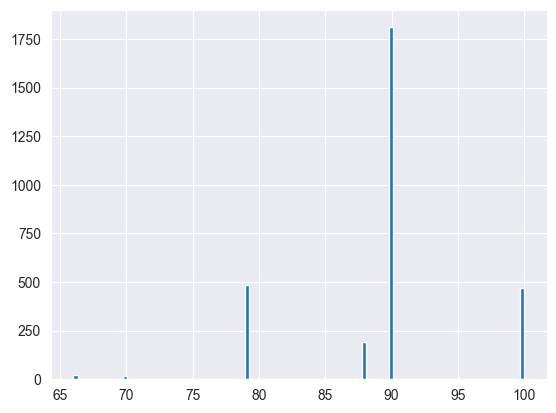

In [217]:
plt.hist(ndfs[0].discount,bins = 100 )

/usr/local/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7010: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()
/var/folders/3p/81nnp2994m19w63h0mm8m4bc0000gn/T/ipykernel_59050/1100540572.py:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([temp[_] for _ in range(len(temp)) if _%2 == 0 ],labels = [string + '- popular' for string in labels])
/var/folders/3p/81nnp2994m19w63h0mm8m4bc0000gn/T/ipykernel_59050/1100540572.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([temp[_] for _ in range(len(temp)) if _%2 == 1 ],labels = [string + '- not popular' for string in labels])
/usr/local/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7010: RuntimeWarnin

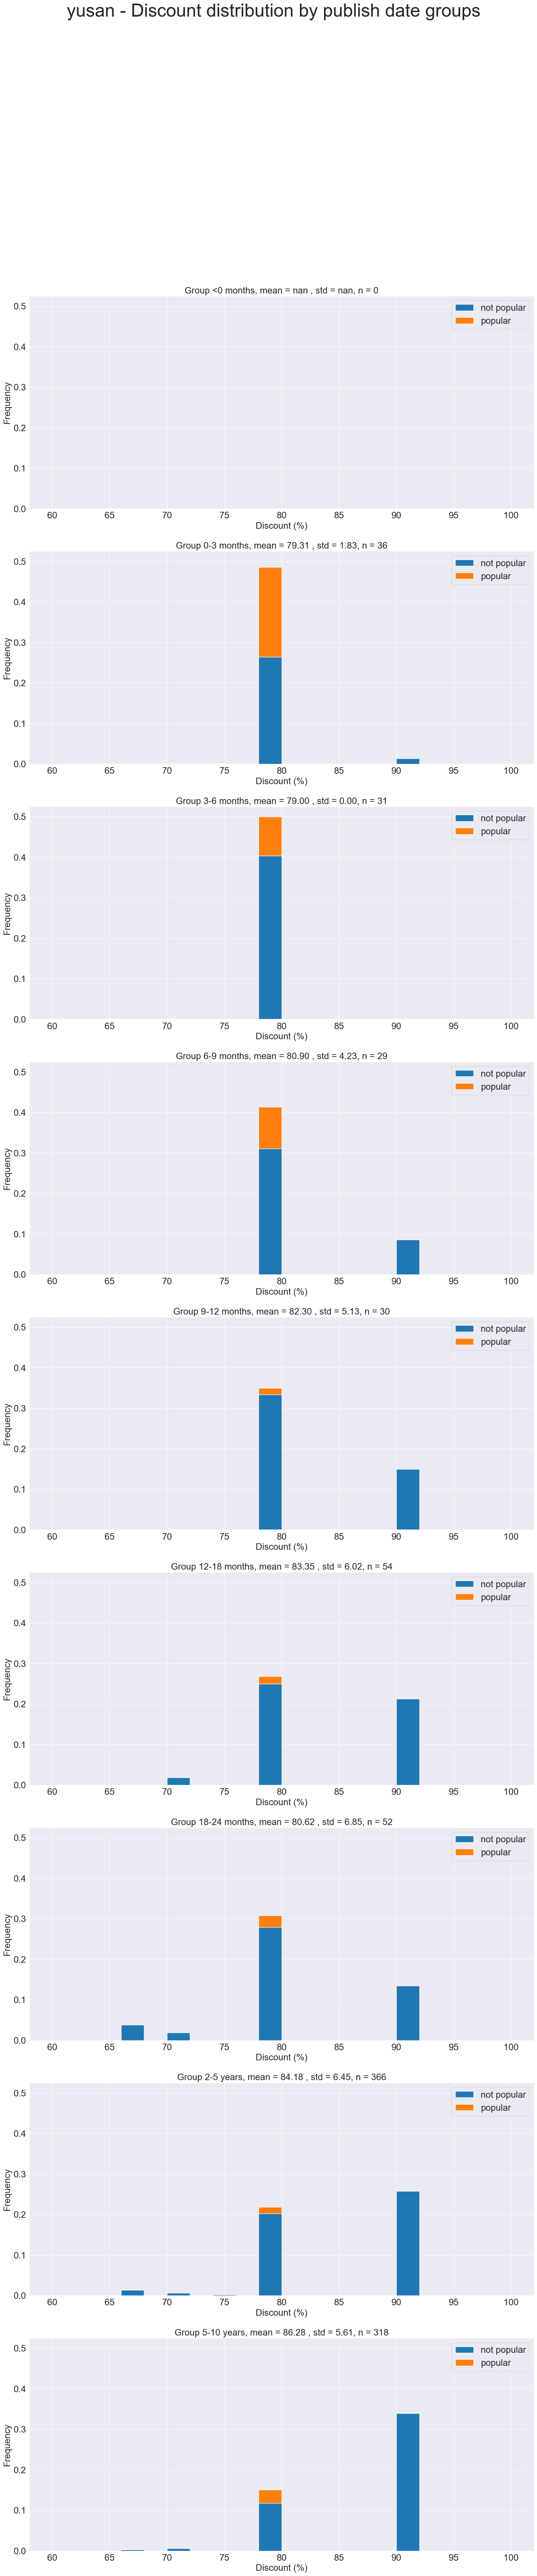

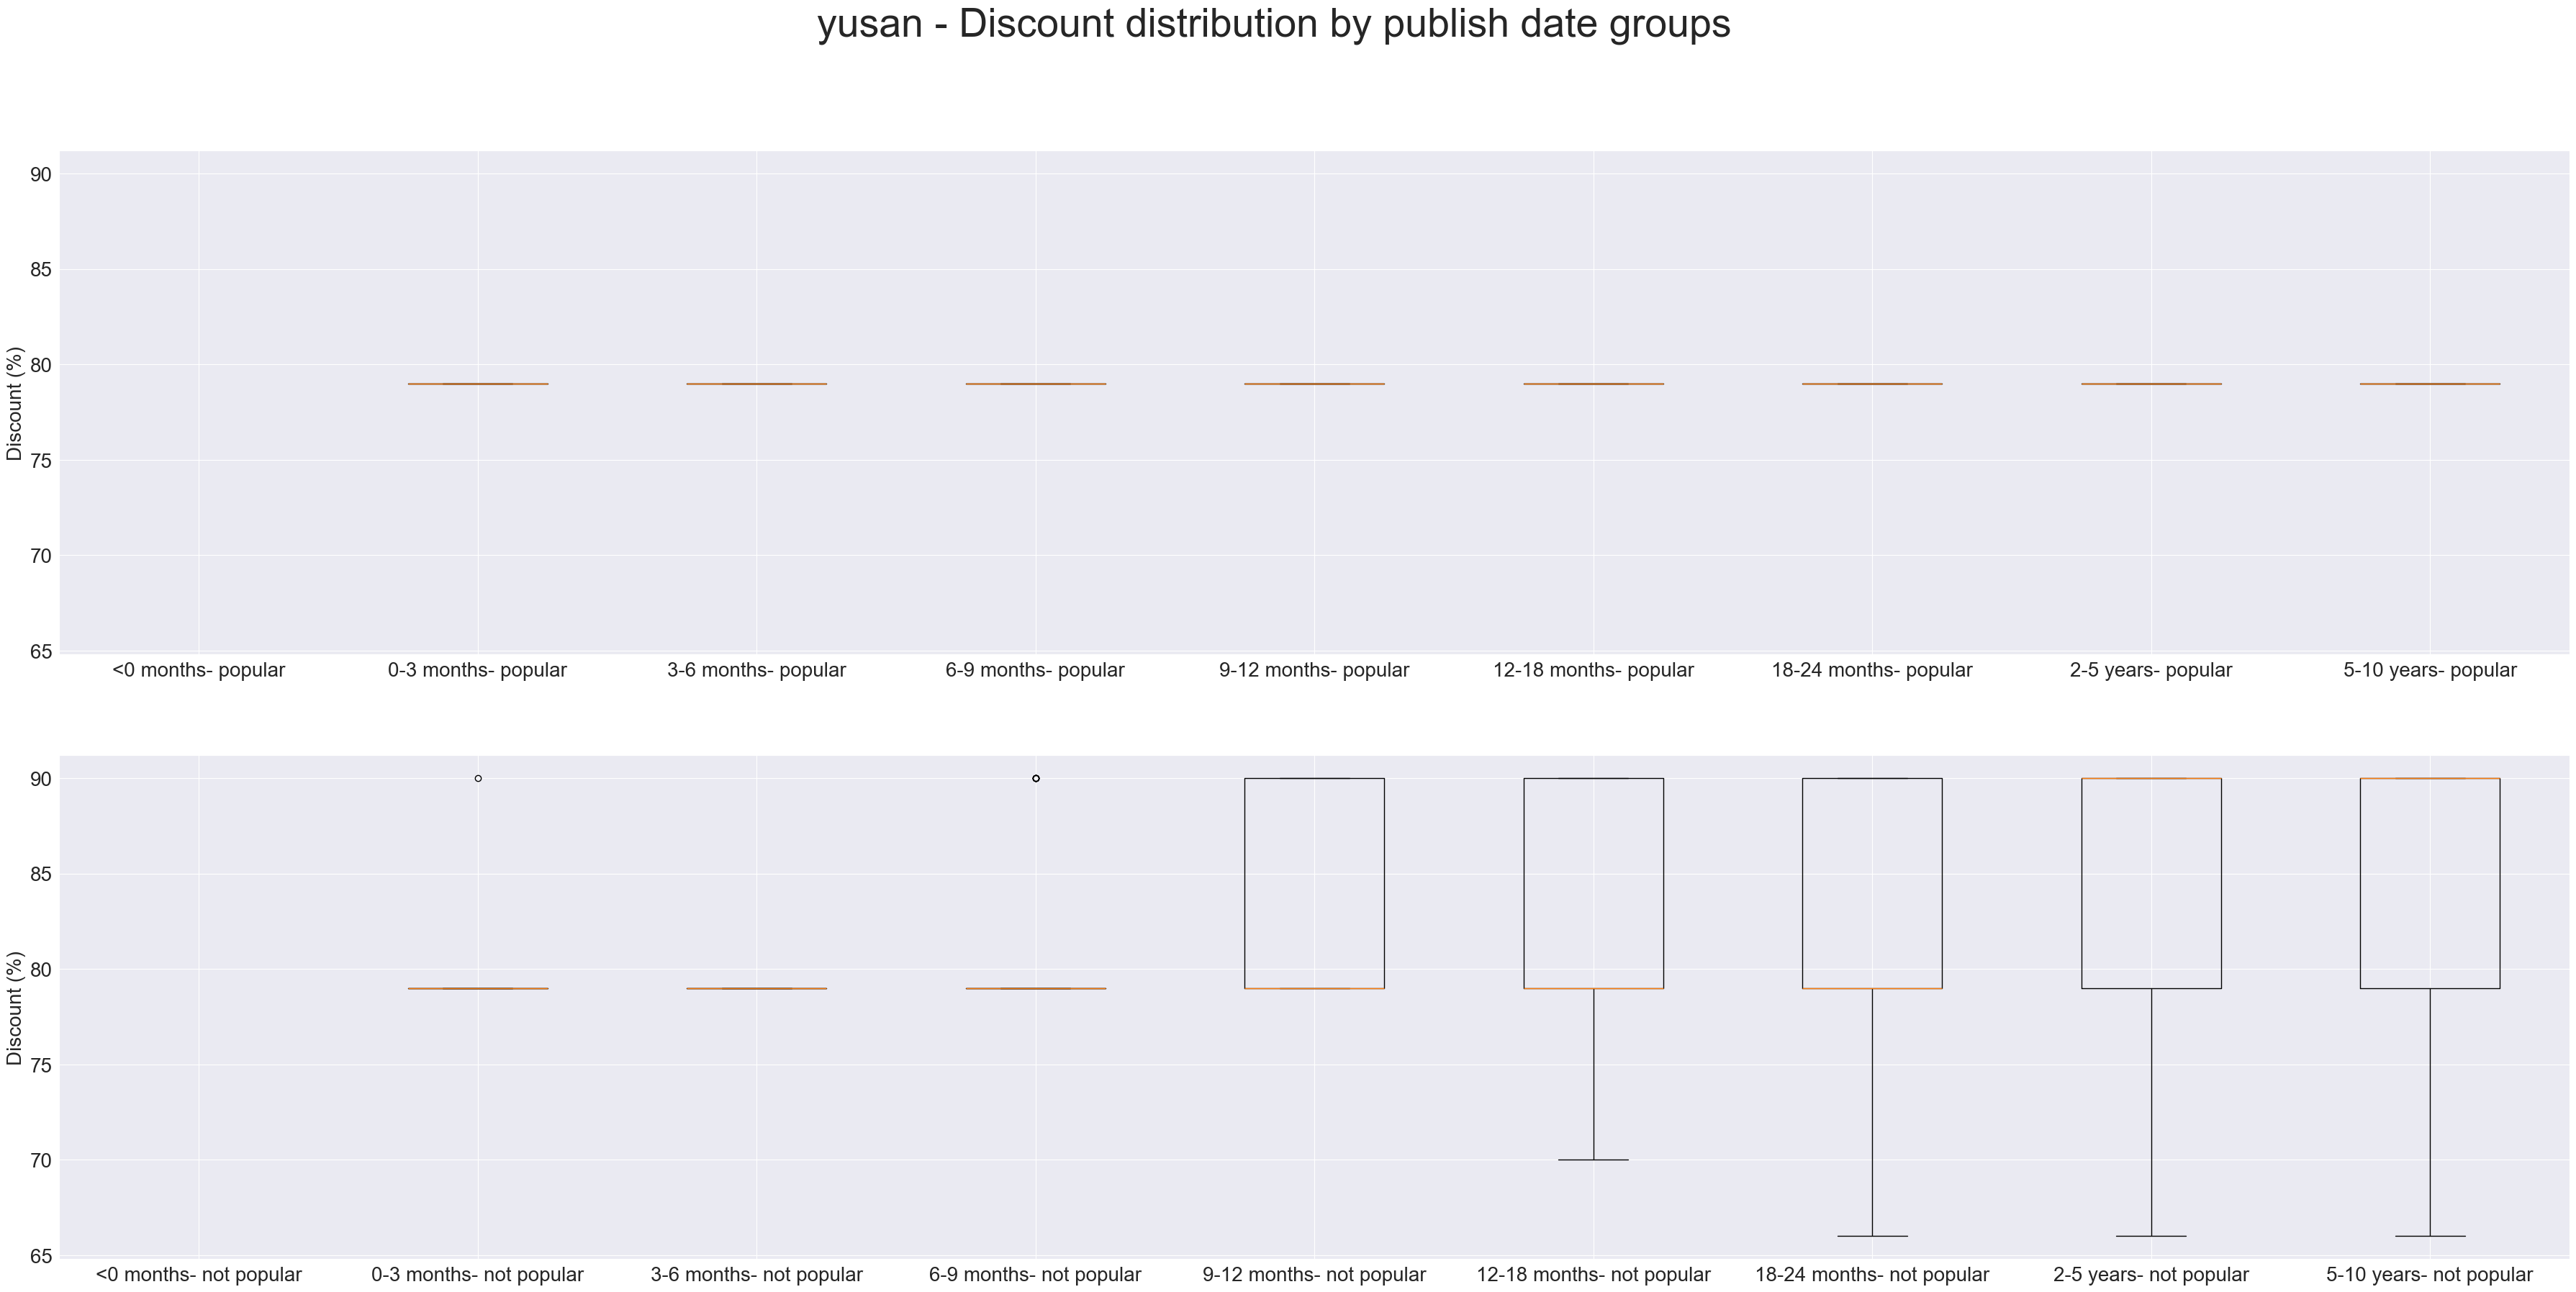

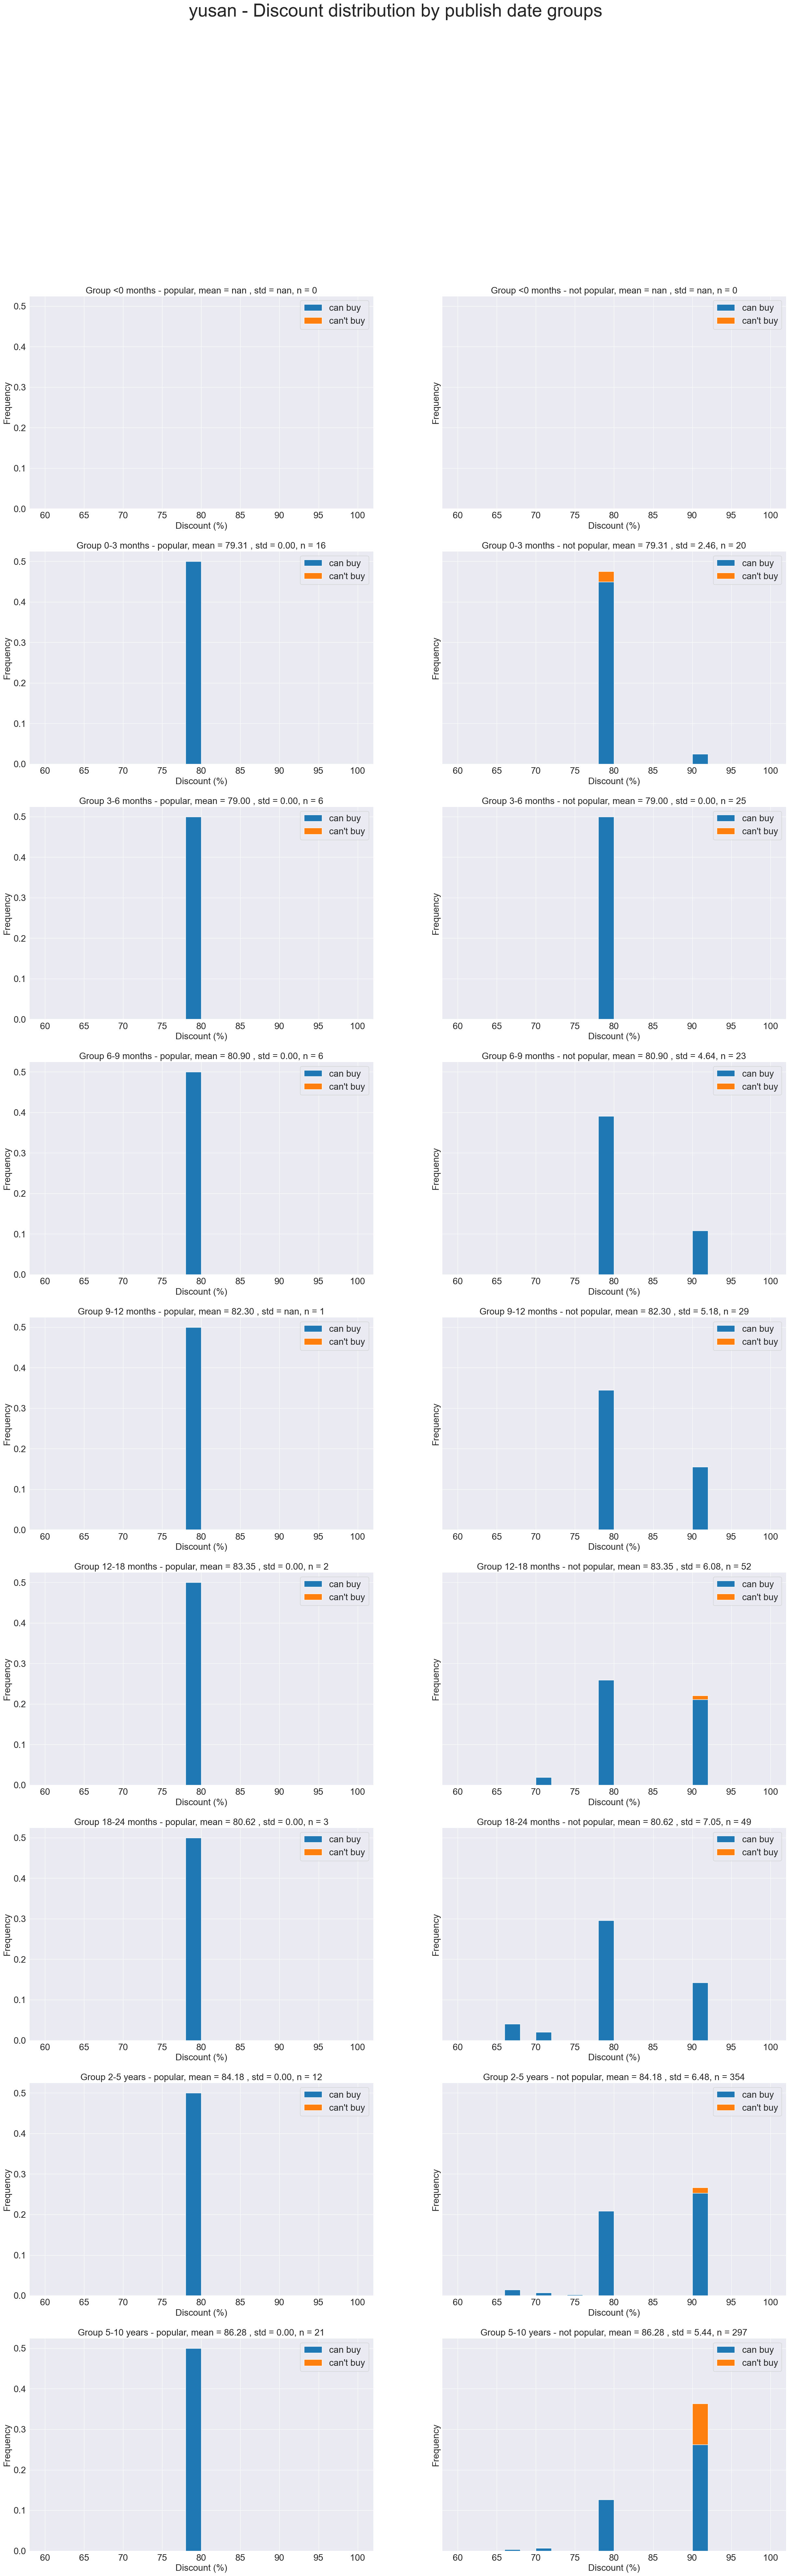

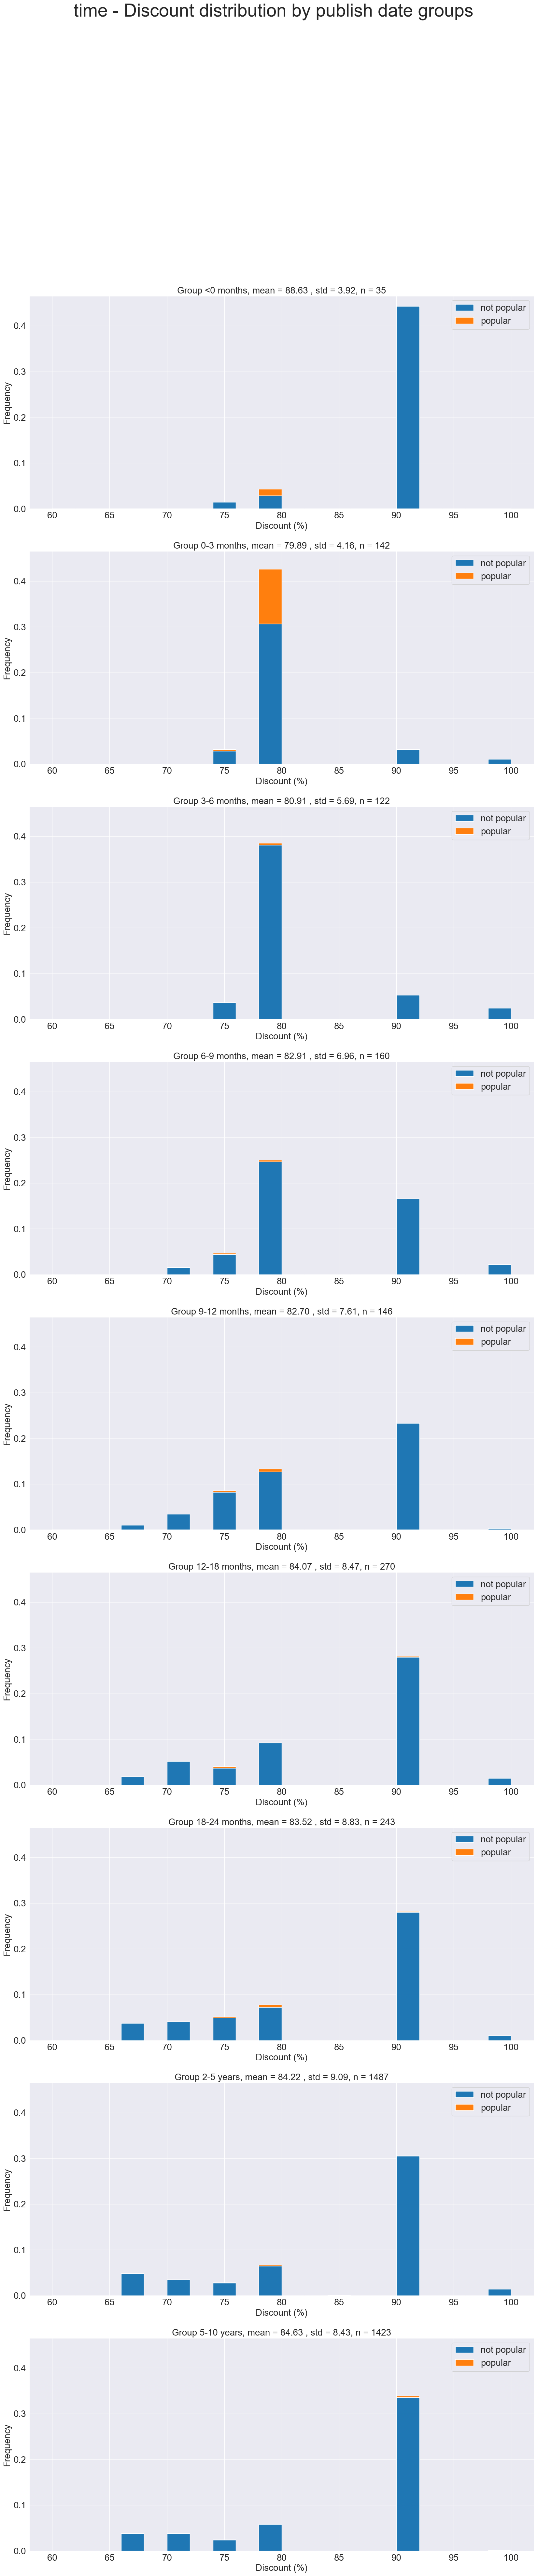

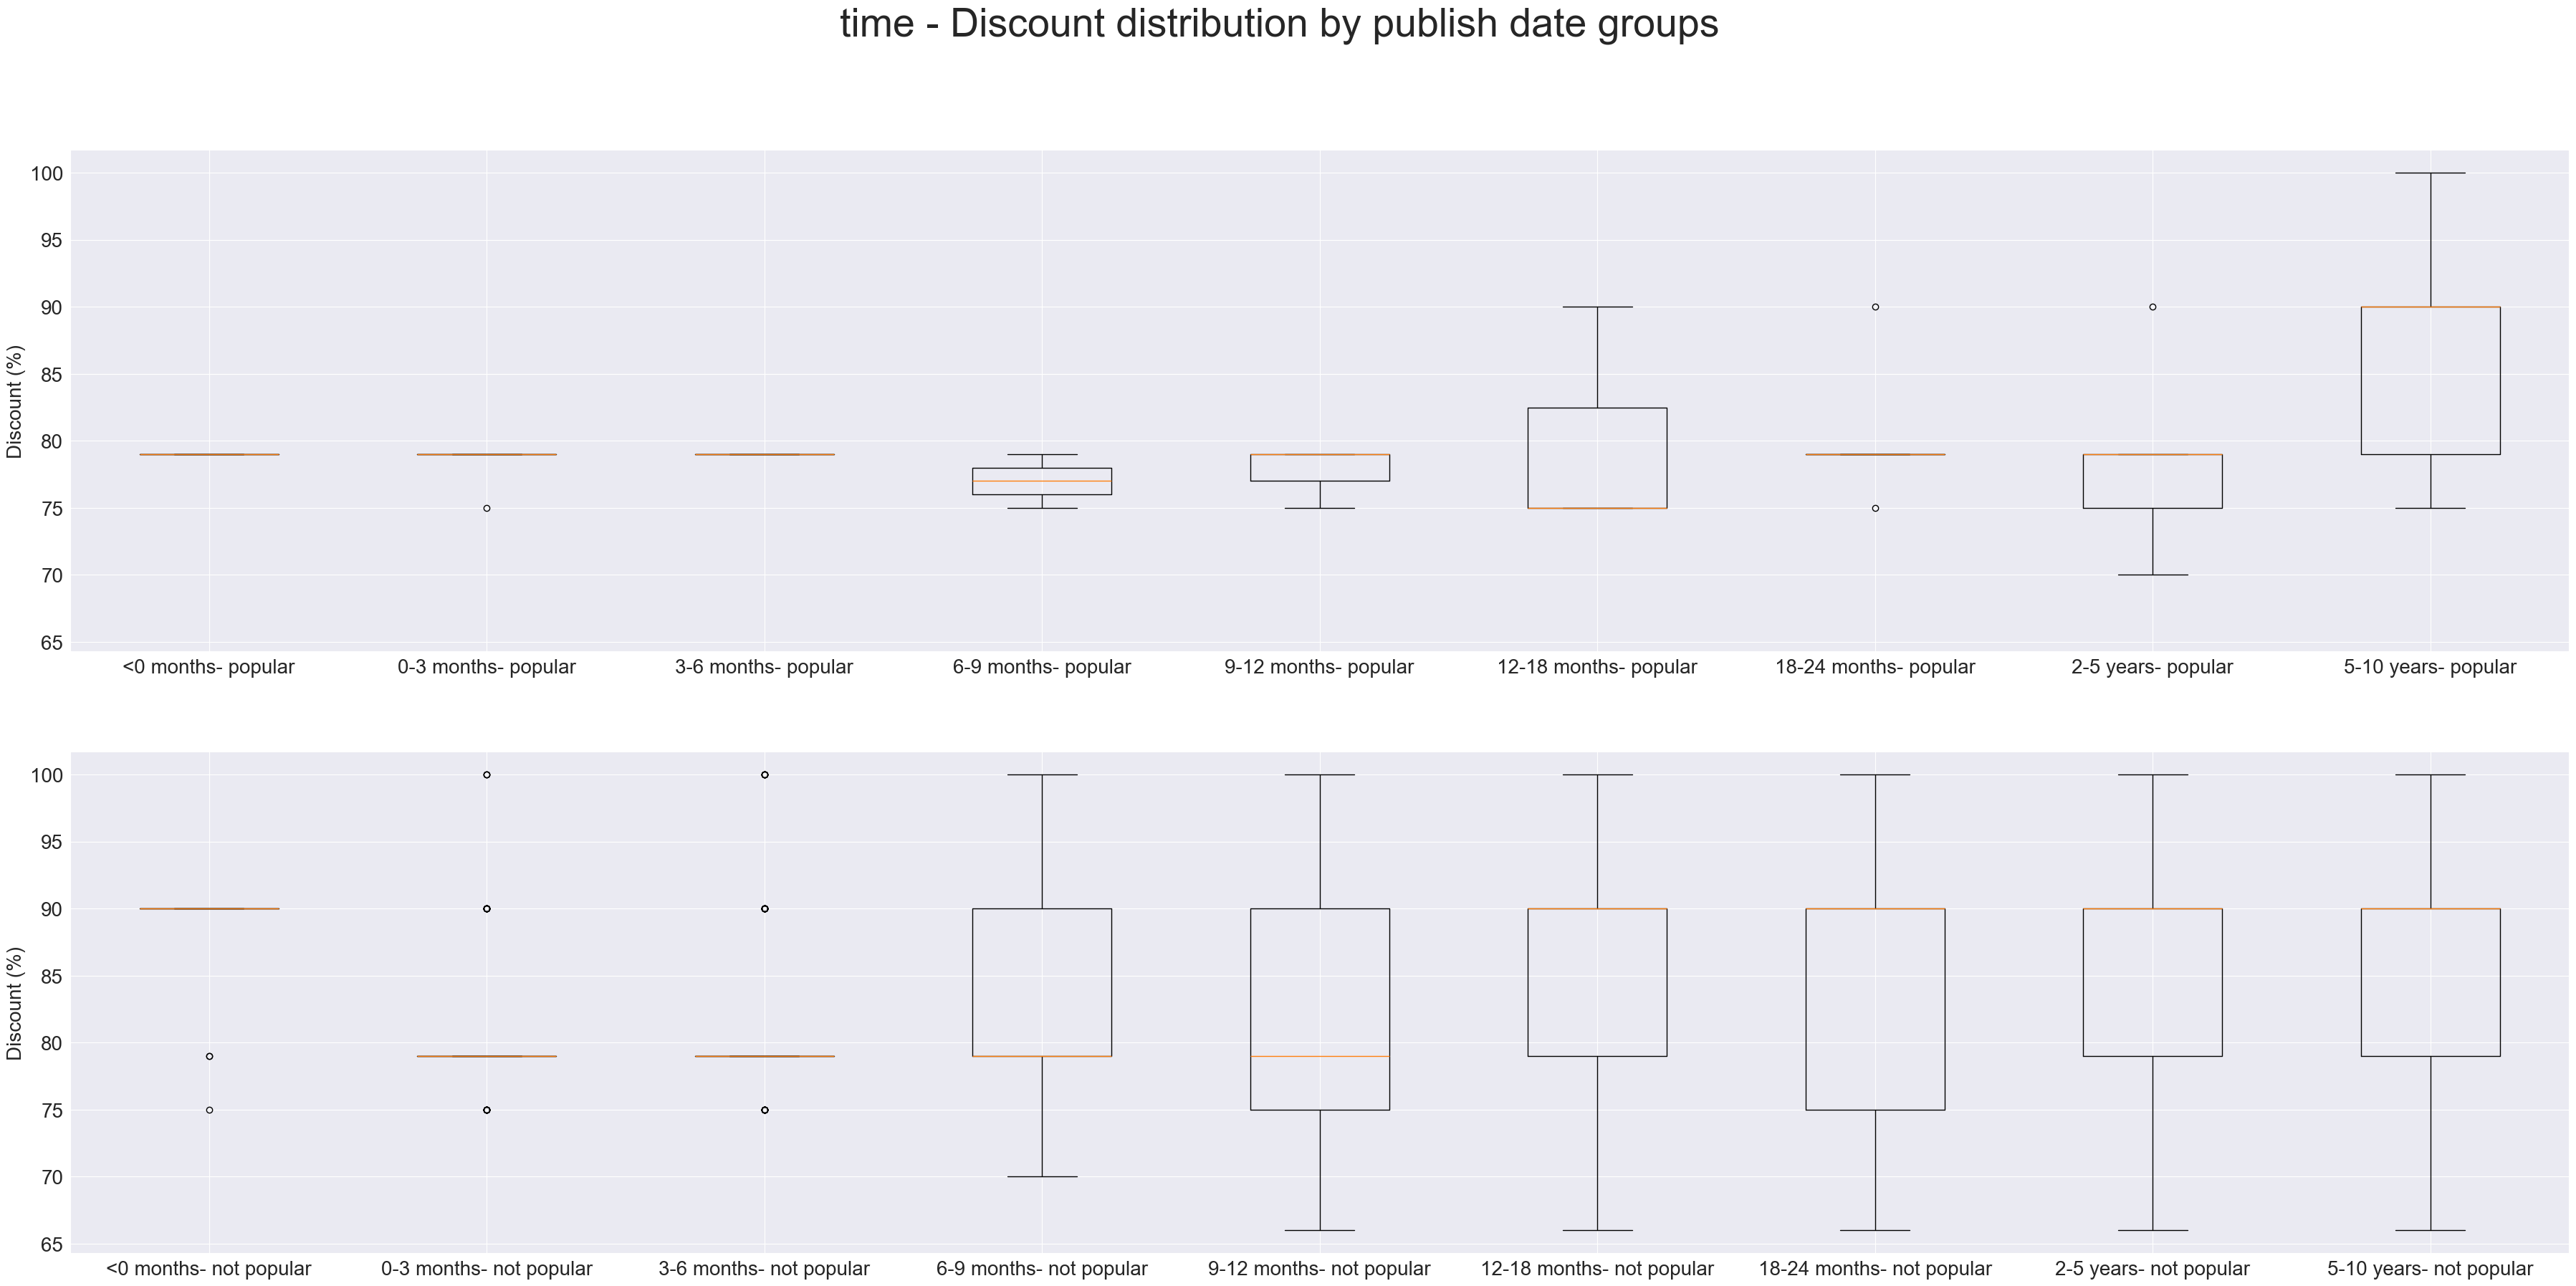

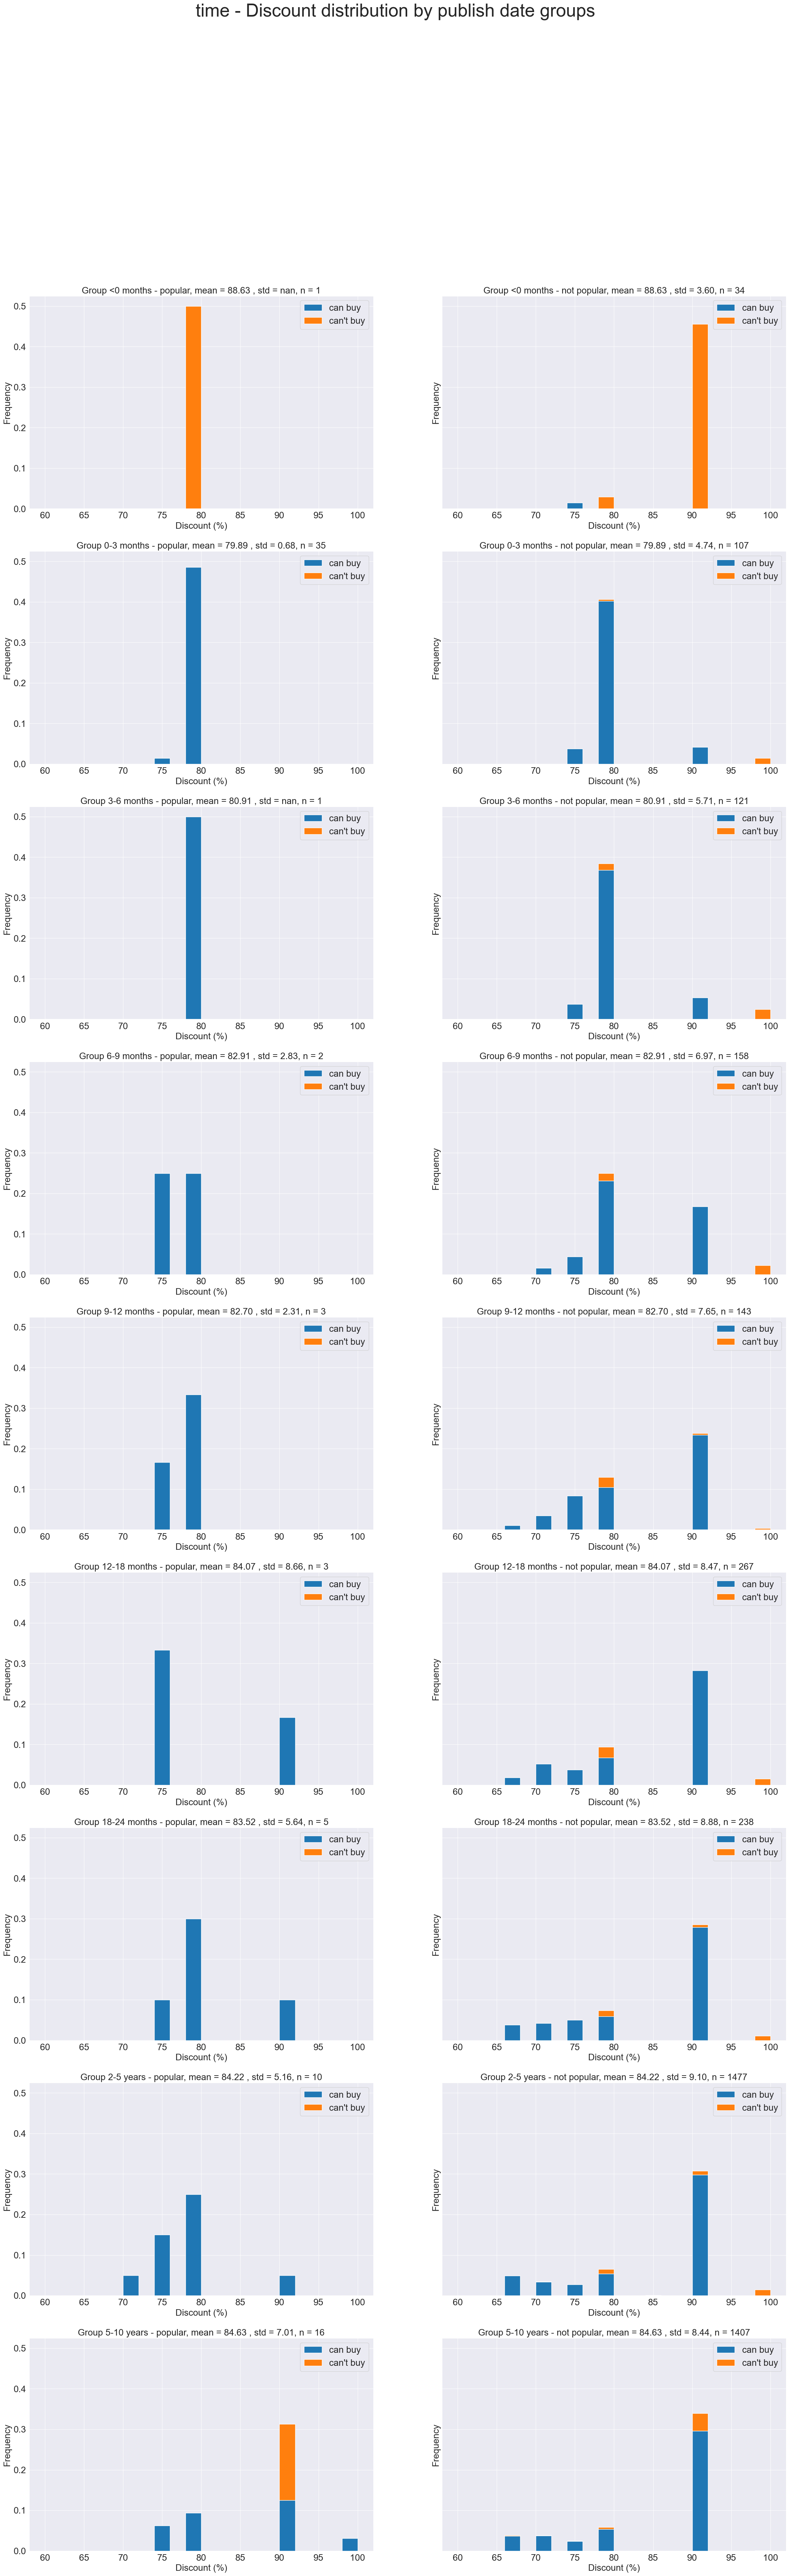

In [218]:
pubs = ['yusan','time']
for __ in range(2):
    pdfss = ndfs[__]
    pdfss = detect_electronic_version(pdfss)
    pdfss = pdfss[pdfss['electronic_version']==False]
    mindate = pd.to_datetime("2024-08-05")
    g0 = pdfss[  mindate - pdfss['publishDate']<= pd.Timedelta(0*30,unit='d') ]
    g1 = pdfss[  mindate - pdfss['publishDate']<= pd.Timedelta(3*30,unit='d') ]
    g1 = g1[mindate - g1['publishDate'] > pd.Timedelta(0*30,unit='d')]
    g2 = pdfss[  mindate - pdfss['publishDate']>= pd.Timedelta(3*30,unit='d') ]
    g2 = g2[mindate - g2['publishDate'] < pd.Timedelta(6*30,unit='d')]
    g3 = pdfss[  mindate - pdfss['publishDate']>= pd.Timedelta(6*30,unit='d') ]
    g3 = g3[mindate - g3['publishDate'] < pd.Timedelta(9*30,unit='d')]
    g4 = pdfss[  mindate - pdfss['publishDate']>= pd.Timedelta(9*30,unit='d') ]
    g4 = g4[mindate - g4['publishDate'] < pd.Timedelta(12*30,unit='d')]
    g5 = pdfss[  mindate - pdfss['publishDate']>= pd.Timedelta(12*30,unit='d') ]
    g5 = g5[mindate - g5['publishDate'] < pd.Timedelta(18*30,unit='d')]
    g6 = pdfss[  mindate - pdfss['publishDate']>= pd.Timedelta(18*30,unit='d') ]
    g6 = g6[mindate - g6['publishDate'] < pd.Timedelta(24*30,unit='d')]
    g7 = pdfss[  mindate - pdfss['publishDate']>= pd.Timedelta(24*30,unit='d') ]
    g7 = g7[mindate - g7['publishDate'] < pd.Timedelta(60*30,unit='d')]
    g8 = pdfss[  mindate - pdfss['publishDate']>= pd.Timedelta(60*30,unit='d') ]
    g8 = g8[mindate - g8['publishDate'] < pd.Timedelta(120*30,unit='d')]

    poplabels = ['popular','not popular']
    boollist = [True,False]
    statistics = pd.DataFrame()
    labels = ['<0 months','0-3 months','3-6 months','6-9 months','9-12 months','12-18 months',
              '18-24 months','2-5 years','5-10 years']

    fig, ax = plt.subplots(9, 1, figsize=(20, 90), sharex=True, sharey=True)
    for idx, g in enumerate([g0,g1, g2, g3, g4, g5, g6,g7,g8]):
        ax[idx].hist([g[g['ispop'] == False]['discount'],g[g['ispop'] == True]['discount']], bins=20, range=(60, 100),density=True,stacked=True,label = ['not popular','popular'])
        ax[idx].set_title('Group %s, mean = %.2f , std = %.2f, n = %d' % (labels[idx],g['discount'].mean(),g['discount'].std(),len(g['discount'])), fontsize=20)
        ax[idx].set_ylabel('Frequency', fontsize=20)
        ax[idx].set_xlabel('Discount (%)',fontsize=20)
        ax[idx].tick_params(axis='both', which='major', labelsize=20,labelbottom=True)
        ax[idx].legend(fontsize=20)
        statistics = pd.concat([statistics,pd.Series(g.describe().discount)],axis=1)
    
    fig.suptitle(f'{pubs[__]} - Discount distribution by publish date groups',fontsize= 40)
    plt.savefig(f"./googleDocxPic/Discount_by_publish_date_{pubs[__]}.png")
# --------------------------------------------------------------------------------------
    
    statistics = pd.DataFrame()
    fig, ax = plt.subplots(2, 1, figsize=(45, 20),sharey = True)
    temp = []
    for idx, g in enumerate([g0,g1, g2, g3, g4, g5, g6,g7,g8]):
        for i in range(2):
            g_ = g[g['ispop'] == boollist[i]]
            temp.append(g_['discount'])
    ax[0].boxplot([temp[_] for _ in range(len(temp)) if _%2 == 0 ],labels = [string + '- popular' for string in labels])
    ax[1].boxplot([temp[_] for _ in range(len(temp)) if _%2 == 1 ],labels = [string + '- not popular' for string in labels])
    ax[0].tick_params(axis='both', which='major', labelsize=20)
    ax[1].tick_params(axis='both', which='major', labelsize=20)
    ax[0].set_ylabel('Discount (%)',fontsize=20)
    ax[1].set_ylabel('Discount (%)',fontsize=20)
    
    fig.suptitle(f'{pubs[__]} - Discount distribution by publish date groups',fontsize= 40)
    plt.savefig(f"./googleDocxPic/Discount_by_publish_date_{pubs[__]}_box.png")
    
#------------------------------------------------------------------------------
    fig, ax = plt.subplots(9, 2, figsize=(30, 90), sharex=True, sharey=True)
    for idx, g in enumerate([g0,g1, g2, g3, g4, g5, g6,g7,g8]):
        for i in range(2):
            g_ = g[g['ispop'] == boollist[i]]
            ax[idx][i].hist([g_[g_['buyable'] == True]['discount'],g_[g_['buyable'] == False]['discount']], bins=20, range=(60, 100),density=True,label = ['can buy',"can't buy"],stacked = True)
            ax[idx][i].set_title('Group %s - %s, mean = %.2f , std = %.2f, n = %d' % (labels[idx],poplabels[i],g['discount'].mean(),g_['discount'].std(),len(g_['discount'])), fontsize=20)
            ax[idx][i].set_ylabel('Frequency', fontsize=20)
            ax[idx][i].set_xlabel('Discount (%)',fontsize=20)
            ax[idx][i].tick_params(axis='both', which='major', labelsize=20,labelbottom=True)
            ax[idx][i].legend(fontsize=20)
        statistics = pd.concat([statistics,pd.Series(g.describe().discount)],axis=1)
    
    fig.suptitle(f'{pubs[__]} - Discount distribution by publish date groups',fontsize= 40)
    plt.savefig(f"./googleDocxPic/Discount_by_publish_date_{pubs[__]}_sep_with_Buyable.png")

In [219]:
statistics.columns = labels
statistics

<0 months  0-3 months  3-6 months  6-9 months  9-12 months  \
count  35.000000  142.000000  122.000000  160.000000   146.000000   
mean   88.628571   79.887324   80.909836   82.906250    82.698630   
min    75.000000   75.000000   75.000000   70.000000    66.000000   
25%    90.000000   79.000000   79.000000   79.000000    75.000000   
50%    90.000000   79.000000   79.000000   79.000000    79.000000   
75%    90.000000   79.000000   79.000000   90.000000    90.000000   
max    90.000000  100.000000  100.000000  100.000000   100.000000   
std     3.918926    4.163500    5.690363    6.960623     7.606141   

       12-18 months  18-24 months    2-5 years   5-10 years  
count    270.000000    243.000000  1487.000000  1423.000000  
mean      84.074074     83.518519    84.217888    84.634575  
min       66.000000     66.000000    66.000000    66.000000  
25%       79.000000     75.000000    79.000000    79.000000  
50%       90.000000     90.000000    90.000000    90.000000  
75%       90.000000     90.000000    90.000000    90.000000  
max      100.000000    100.000000   100.000000   100.000000  
std        8.465657      8.833320     9.092889     8.429653

In [220]:
pdfss = ndfs[1]
mindate = pd.to_datetime("2024-05-03")
pdfss = pdfss[pdfss['electronic_version']==False]
g1 = pdfss[  mindate - pdfss['publishDate']<= pd.Timedelta(0,unit='d') ]

g1

title   author publisher  \
97                                              小狼人好害怕  安迪‧哈克尼斯      時報出版   
98   金錢靈氣：來自大天使的15堂豐盛課，調整自我意識與金錢間的能量流動，達到身心靈的平衡 (隨書...  子玄,白靈聖芬      時報出版   
99                  百鬼夜行誌【童話卷】(一+二)套書(附贈「驚悚童話」酷卡，一組2張)       阿慢      時報出版   
100                 百鬼夜行誌【童話卷二】(限量贈送「暗黑本」!加碼2篇全新未公開故事)       阿慢      時報出版   
101                                        百鬼夜行誌【童話卷二】       阿慢      時報出版   
..                                                 ...      ...       ...   
360                          單純【法國兒童文學現代經典，國際安徒生獎作家作品】  瑪麗奧德．穆海      時報出版   
361                                            我的冤家我的親      張慰慈      時報出版   
362                        最後的使團：1795年荷蘭使團和一段被遺忘的中西相遇史      歐陽泰      時報出版   
363                                           親人罹癌，先別慌       王興      時報出版   
364                                          羅生門 (有聲書)    芥川龍之介      時報出版   

    publication_date  discount price  \
97        2024-08-20        90   315   
98        2024-08-20        90   540   
99        2024-08-20        90   540   
100       2024-08-20        90   288   
101       2024-08-20        90   288   
..               ...       ...   ...   
360       2024-05-07        79   300   
361       2024-05-07        79   252   
362       2024-05-07        79   458   
363       2024-05-07        90   360   
364       2024-05-06       100   420   

                                                   url  canbuy publishDate  \
97   https://www.books.com.tw/products/0010997371?l...   False  2024-08-20   
98   https://www.books.com.tw/products/0010997375?l...   False  2024-08-20   
99   https://www.books.com.tw/products/0010997353?l...   False  2024-08-20   
100  https://www.books.com.tw/products/0010997355?l...   False  2024-08-20   
101  https://www.books.com.tw/products/0010997356?l...   False  2024-08-20   
..                                                 ...     ...         ...   
360  https://www.books.com.tw/products/0010987770?l...    True  2024-05-07   
361  https://www.books.com.tw/products/0010987754?l...    True  2024-05-07   
362  https://www.books.com.tw/products/0010987761?l...    True  2024-05-07   
363  https://www.books.com.tw/products/0010987771?l...    True  2024-05-07   
364  https://www.books.com.tw/products/E070004149?l...   False  2024-05-06   

     original_price  buyable  electronic_version  ispop  
97       350.000000    False               False  False  
98       600.000000    False               False  False  
99       600.000000    False               False  False  
100      320.000000    False               False  False  
101      320.000000    False               False  False  
..              ...      ...                 ...    ...  
360      379.746835     True               False  False  
361      318.987342     True               False  False  
362      579.746835     True               False  False  
363      400.000000     True               False  False  
364      420.000000    False               False  False  

[178 rows x 13 columns]

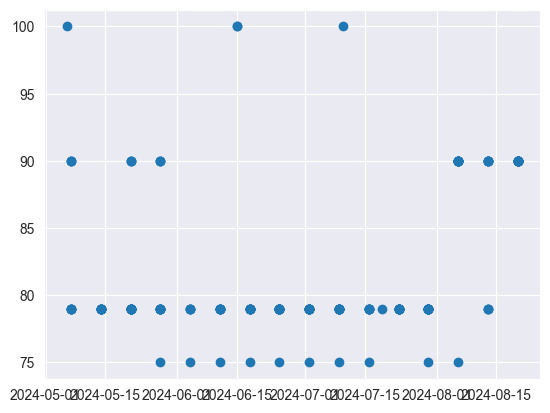

In [221]:
plt.scatter(g1['publishDate'],g1['discount'])

In [222]:
import xgboost as xgb
g3.describe().discount


count    160.000000
mean      82.906250
min       70.000000
25%       79.000000
50%       79.000000
75%       90.000000
max      100.000000
std        6.960623
Name: discount, dtype: float64

In [223]:
len(dfs)

7